<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/009_randomforest_xgb_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.05.07 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with Random Forest Regressor & XGB Regressor - Results (2018-2022)**

### Contents

##### 1. Input Data
##### 5. Model Training
*  預先訓練多個模型並儲存

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  Random Forest
*  XGB (hyperparameters tuned by 5-fold cross validation)
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%
*  Feature Importance

##### 9. Best and Worst Model
*  各模型組合中，預測最好和最差的月份
*  Random Forest 和 XGB 各自預測最好和最差的模型組合 (with Feature Importance)
*  所有模型組合中，預測最好和最差的模型組合 (with Feature Importance)


## **0. Setup**

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.7 MB/s eta 0:00:00


In [ ]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/.shortcut-targets-by-id/1xHzysZb8eXBG5PPEXnRYMPBvoZ2xqC3u/論文/code/Function


In [ ]:
from MonRevForecast import predictMonthlyRevenue, BestWorstModel, trainMonthlyRevenue

importing Jupyter notebook from MonRevForecast.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.9 MB/s eta 0:00:00


In [ ]:
from MonRevPlot import plotExpectedPredictedRevenues, plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [ ]:
from MonRevPlot import plotAllScores, compareModelScore, scoreBoxplotV

In [ ]:
from MonRevPlot import plotFeatureImportance, BestWorstModelFeatureImportancePlot

### **Project Path**

In [ ]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

【**月營收盈餘 (2013-2022)**】

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [ ]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
公司                                                                        
1101 台泥   9134465  5540346  9457971  9919269  9543782  9517630  9875888   
1102 亞泥   6018213  2552357  5428755  5930748  6239676  5952754  5942364   
1103 嘉泥    288455   166638   286007   365292   382601   302995   294781   
1104 環泥    486481   299860   461732   394631   406677   415968   453397   
1108 幸福    481802   276936   444917   362054   381384   368109   439572   
...           ...      ...      ...      ...      ...      ...      ...   
9951 皇田    201785   167967   240746   243935   238296   193880   198427   
9955 佳龍    394489   383183   428478   564053   336622   295391   434605   
9958 世紀鋼   198944   166364   351222   280864   289332   426371   213281   
9960 邁達康    52534    41935    61642    70998    81508    64525    62085   
9962 有益    298876   327002   313861   241566   251782   273664   174682   

          2013-08   2013-09   2013-10  ...  2022-03  2022-04  2022-05  \
公司                                     ...                              
1101 台泥   9835143  10060975  10654077  ...  9971650  8319342  7733787   
1102 亞泥   5786107   5879394   6478670  ...  8160414  8710220  8000427   
1103 嘉泥    336088    314563    429783  ...   220463   168089   163521   
1104 環泥    393203    448691    521445  ...   591593   638493   537082   
1108 幸福    379115    387362    450770  ...   345612   335518   332258   
...           ...       ...       ...  ...      ...      ...      ...   
9951 皇田    256724    228796    250756  ...   374229   302262   323433   
9955 佳龍    306534    266617    363766  ...    96200   101850    95096   
9958 世紀鋼   302589    401695    255738  ...   626104   401960   673479   
9960 邁達康    60960     60309     61582  ...    60275    86754    69752   
9962 有益    238490    165340    202491  ...   366892   248958   228412   

          2022-06   2022-07   2022-08   2022-09   2022-10  2022-11   2022-12  
公司                                                                            
1101 台泥   9145989  10102468  10689860  10404901  11368096  9674576  12584154  
1102 亞泥   7776413   7864622   7069221   6994078   7601097  8306062   8340507  
1103 嘉泥    183177    178825    182371    205264    209429   221763    228644  
1104 環泥    573028    580420    605512    597159    634981   631827    725055  
1108 幸福    334113    326691    390053    346635    401202   383773    418326  
...           ...       ...       ...       ...       ...      ...       ...  
9951 皇田    371791    337581    468608    464373    432835   500111    506796  
9955 佳龍     80726     85625     81881     79179     80630    91270     84115  
9958 世紀鋼   665459    651699    757968    903198    911834   944060   1082675  
9960 邁達康   103280     64983    105969    113755     78996    96570     58764  
9962 有益    387082    248327    318092    264270    307426   308663    385673  

[1240 rows x 120 columns]

In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


## **5. Model Training**

#### **5.1.3 預先訓練多個模型並儲存**

2023.04.06

In [ ]:
test_y_1 = 2018
test_y_2 = 2019
test_y_3 = 2020
test_y_4 = 2021
test_y_5 = 2022
start_m_1 = 1 
end_m_1 = 12

##### **Random Forest**
35 min.

In [ ]:
model_save_path_rf = os.path.join(project_path, 'model/rf')

2018

In [ ]:
trainMonthlyRevenue(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'rf', model_save_path_rf)

2018-01 model saved. Using time: 39.459  secs.
2018-02 model saved. Using time: 32.693  secs.
2018-03 model saved. Using time: 32.876  secs.
2018-04 model saved. Using time: 32.733  secs.
2018-05 model saved. Using time: 31.833  secs.
2018-06 model saved. Using time: 34.181  secs.
2018-07 model saved. Using time: 32.940  secs.
2018-08 model saved. Using time: 32.830  secs.
2018-09 model saved. Using time: 34.313  secs.
2018-10 model saved. Using time: 32.828  secs.
2018-11 model saved. Using time: 32.066  secs.
2018-12 model saved. Using time: 35.862  secs.


2019

In [ ]:
trainMonthlyRevenue(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'rf', model_save_path_rf)

2019-01 model saved. Using time: 32.777  secs.
2019-02 model saved. Using time: 32.508  secs.
2019-03 model saved. Using time: 33.978  secs.
2019-04 model saved. Using time: 31.687  secs.
2019-05 model saved. Using time: 32.132  secs.
2019-06 model saved. Using time: 32.331  secs.
2019-07 model saved. Using time: 33.631  secs.
2019-08 model saved. Using time: 32.021  secs.
2019-09 model saved. Using time: 32.994  secs.
2019-10 model saved. Using time: 34.733  secs.
2019-11 model saved. Using time: 32.824  secs.
2019-12 model saved. Using time: 34.464  secs.


2020

In [ ]:
trainMonthlyRevenue(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'rf', model_save_path_rf)

2020-01 model saved. Using time: 35.733  secs.
2020-02 model saved. Using time: 34.133  secs.
2020-03 model saved. Using time: 35.612  secs.
2020-04 model saved. Using time: 34.513  secs.
2020-05 model saved. Using time: 36.139  secs.
2020-06 model saved. Using time: 35.385  secs.
2020-07 model saved. Using time: 35.341  secs.
2020-08 model saved. Using time: 35.585  secs.
2020-09 model saved. Using time: 37.392  secs.
2020-10 model saved. Using time: 35.724  secs.
2020-11 model saved. Using time: 36.506  secs.
2020-12 model saved. Using time: 36.795  secs.


2021

In [ ]:
trainMonthlyRevenue(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'rf', model_save_path_rf)

2021-01 model saved. Using time: 32.169  secs.
2021-02 model saved. Using time: 32.621  secs.
2021-03 model saved. Using time: 33.772  secs.
2021-04 model saved. Using time: 32.528  secs.
2021-05 model saved. Using time: 31.805  secs.
2021-06 model saved. Using time: 31.807  secs.
2021-07 model saved. Using time: 32.947  secs.
2021-08 model saved. Using time: 33.641  secs.
2021-09 model saved. Using time: 32.209  secs.
2021-10 model saved. Using time: 31.841  secs.
2021-11 model saved. Using time: 33.326  secs.
2021-12 model saved. Using time: 32.331  secs.


2022

In [ ]:
trainMonthlyRevenue(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'rf', model_save_path_rf)

2022-01 model saved. Using time: 31.828  secs.
2022-02 model saved. Using time: 31.348  secs.
2022-03 model saved. Using time: 32.994  secs.
2022-04 model saved. Using time: 31.806  secs.
2022-05 model saved. Using time: 32.420  secs.
2022-06 model saved. Using time: 32.362  secs.
2022-07 model saved. Using time: 31.978  secs.
2022-08 model saved. Using time: 31.477  secs.
2022-09 model saved. Using time: 32.152  secs.
2022-10 model saved. Using time: 32.625  secs.
2022-11 model saved. Using time: 34.708  secs.
2022-12 model saved. Using time: 33.871  secs.


##### **XGB**

6 min. with GPU
<br>
Grid Search: Hyperparameters tuned by 5-fold cross validation.


In [ ]:
model_save_path_xgb = os.path.join(project_path, 'model/xgb')

2018

In [ ]:
trainMonthlyRevenue(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'xgb', model_save_path_xgb)

2018-01 model saved. Using time: 6.551  secs.
2018-02 model saved. Using time: 7.410  secs.
2018-03 model saved. Using time: 4.665  secs.
2018-04 model saved. Using time: 7.330  secs.
2018-05 model saved. Using time: 4.708  secs.
2018-06 model saved. Using time: 4.942  secs.
2018-07 model saved. Using time: 5.857  secs.
2018-08 model saved. Using time: 4.893  secs.
2018-09 model saved. Using time: 7.054  secs.
2018-10 model saved. Using time: 4.853  secs.
2018-11 model saved. Using time: 7.605  secs.
2018-12 model saved. Using time: 4.801  secs.


2019

In [ ]:
trainMonthlyRevenue(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'xgb', model_save_path_xgb)

2019-01 model saved. Using time: 7.204  secs.
2019-02 model saved. Using time: 4.857  secs.
2019-03 model saved. Using time: 4.636  secs.
2019-04 model saved. Using time: 6.154  secs.
2019-05 model saved. Using time: 4.770  secs.
2019-06 model saved. Using time: 7.494  secs.
2019-07 model saved. Using time: 4.629  secs.
2019-08 model saved. Using time: 7.242  secs.
2019-09 model saved. Using time: 4.624  secs.
2019-10 model saved. Using time: 6.497  secs.
2019-11 model saved. Using time: 4.896  secs.
2019-12 model saved. Using time: 4.896  secs.


2020

In [ ]:
trainMonthlyRevenue(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'xgb', model_save_path_xgb)

2020-01 model saved. Using time: 4.716  secs.
2020-02 model saved. Using time: 6.473  secs.
2020-03 model saved. Using time: 4.592  secs.
2020-04 model saved. Using time: 7.063  secs.
2020-05 model saved. Using time: 4.505  secs.
2020-06 model saved. Using time: 6.592  secs.
2020-07 model saved. Using time: 4.741  secs.
2020-08 model saved. Using time: 4.927  secs.
2020-09 model saved. Using time: 6.467  secs.
2020-10 model saved. Using time: 4.824  secs.
2020-11 model saved. Using time: 7.107  secs.
2020-12 model saved. Using time: 4.833  secs.


2021

In [ ]:
trainMonthlyRevenue(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'xgb', model_save_path_xgb)

2021-01 model saved. Using time: 7.369  secs.
2021-02 model saved. Using time: 4.593  secs.
2021-03 model saved. Using time: 4.841  secs.
2021-04 model saved. Using time: 6.057  secs.
2021-05 model saved. Using time: 4.883  secs.
2021-06 model saved. Using time: 7.089  secs.
2021-07 model saved. Using time: 4.792  secs.
2021-08 model saved. Using time: 7.059  secs.
2021-09 model saved. Using time: 4.845  secs.
2021-10 model saved. Using time: 4.721  secs.
2021-11 model saved. Using time: 5.764  secs.
2021-12 model saved. Using time: 4.633  secs.


2022

In [ ]:
trainMonthlyRevenue(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'xgb', model_save_path_xgb)

2022-01 model saved. Using time: 7.344  secs.
2022-02 model saved. Using time: 4.640  secs.
2022-03 model saved. Using time: 7.316  secs.
2022-04 model saved. Using time: 4.633  secs.
2022-05 model saved. Using time: 4.760  secs.
2022-06 model saved. Using time: 5.842  secs.
2022-07 model saved. Using time: 4.842  secs.
2022-08 model saved. Using time: 7.050  secs.
2022-09 model saved. Using time: 4.921  secs.
2022-10 model saved. Using time: 7.226  secs.
2022-11 model saved. Using time: 4.604  secs.
2022-12 model saved. Using time: 4.877  secs.


## **7. Predicting Results & Feature Importance**

y_train = y_test 往前 12 個月

||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2013-01 - 2016-12|2017-01|2014-01 - 2017-12|**2018-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|

In [ ]:
# 訓練資料起始年
file_category = '2013'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output (2023.04.04)
def outputPredictingResults(category: str, modelName: str, pred: dict):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_pred_{modelName}_{category}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_pred_{modelName}_{category}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_pred_{modelName}_{category}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_pred_{modelName}_{category}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_pred_{modelName}_{category}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_pred_{modelName}_{category}.xlsx'))

def outputFeatureImportance(category: str, modelName: str, feature_importance: dict):
    feature_importance['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_feature_{modelName}_{category}.xlsx'))
    feature_importance['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_feature_{modelName}_{category}.xlsx'))
    feature_importance['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_feature_{modelName}_{category}.xlsx'))
    feature_importance['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_feature_{modelName}_{category}.xlsx'))
    feature_importance['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_feature_{modelName}_{category}.xlsx'))
    feature_importance['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_feature_{modelName}_{category}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/scores_{modelName}_{category}.xlsx'))

### **7.2 Random Forest**

In [ ]:
# Load trained models
model_save_path_rf = os.path.join(project_path, 'model/rf')

In [ ]:
# Random Forest (10 min)
pred_rf, feature_importance_rf, scores_rf = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'rf', model_save_path_rf)

Using time: 572.685  secs.


In [ ]:
# Output (2023.04.04)
outputPredictingResults(file_category, 'rf', pred_rf)
outputFeatureImportance(file_category, 'rf', feature_importance_rf)
outputScores(file_category, 'rf', scores_rf)

#### **7.2.1 Predicting Results**

In [ ]:
# Original
print(pred_rf['org']['org'].shape)
print(pred_rf['org']['dec'].shape)
print(pred_rf['org']['season'].shape)
pred_rf['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  7687118.0  6643918.0  8592370.0  8204816.0  9058362.0  9130560.0   
1102 亞泥  4711721.0  4837009.0  5513656.0  5253469.0  5703934.0  5547076.0   
1103 嘉泥   181142.0   150472.0   184270.0   160470.0   165880.0   182359.0   
1104 環泥   338362.0   393912.0   382066.0   382350.0   393865.0   420382.0   

            2018-07     2018-08     2018-09    2018-10  ...    2022-03  \
1101 台泥  10299365.0  10982584.0  10612208.0  9908386.0  ...  8751814.0   
1102 亞泥   5705193.0   6423034.0   6790633.0  7394796.0  ...  6789703.0   
1103 嘉泥    187033.0    169909.0    205837.0   160784.0  ...   196904.0   
1104 環泥    383638.0    400447.0    386167.0   384301.0  ...   559222.0   

           2022-04    2022-05    2022-06    2022-07     2022-08     2022-09  \
1101 台泥  9520186.0  8704095.0  8329200.0  8711451.0  10546458.0  11785224.0   
1102 亞泥  7701624.0  8021801.0  8251923.0  8489864.0   8369998.0   8381168.0   
1103 嘉泥   207925.0   197517.0   180786.0   195880.0    181635.0    185849.0   
1104 環泥   552122.0   665261.0   532555.0   588613.0    575870.0    606605.0   

            2022-10     2022-11     2022-12  
1101 台泥  10493530.0  10775442.0  11782233.0  
1102 亞泥   7806965.0   8683145.0   9031302.0  
1103 嘉泥    191859.0    208889.0    215489.0  
1104 環泥    599387.0    637427.0    617884.0  

[4 rows x 60 columns]

In [ ]:
# Deflating
print(pred_rf['def']['org'].shape)
print(pred_rf['def']['dec'].shape)
print(pred_rf['def']['season'].shape)
pred_rf['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04     2018-05     2018-06  \
1101 台泥  7495552.0  7977251.0  8290165.0  7972374.0  10260372.0  11161686.0   
1102 亞泥  4871932.0  5286677.0  5839072.0  5717613.0   6648955.0   7422577.0   
1103 嘉泥   154486.0   127297.0   173199.0   166338.0    176335.0    174232.0   
1104 環泥   351562.0   366327.0   395945.0   367939.0    389771.0    439817.0   

            2018-07     2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  10401387.0  11583448.0  11083075.0  10212226.0  ...  8509043.0   
1102 亞泥   7179493.0   7833984.0   7508506.0   7222731.0  ...  8239920.0   
1103 嘉泥    179913.0    164861.0    190210.0    174488.0  ...   162756.0   
1104 環泥    360792.0    361679.0    370337.0    377254.0  ...   547009.0   

           2022-04    2022-05    2022-06    2022-07     2022-08     2022-09  \
1101 台泥  9559658.0  8968469.0  8550343.0  8856847.0  10160619.0  11716002.0   
1102 亞泥  8037943.0  8839889.0  8108415.0  8161227.0   8529228.0   7462680.0   
1103 嘉泥   208951.0   178109.0   161638.0   178404.0    182685.0    184750.0   
1104 環泥   566082.0   614572.0   559413.0   588888.0    590608.0    610269.0   

           2022-10     2022-11     2022-12  
1101 台泥  9857677.0  11527349.0  10992171.0  
1102 亞泥  7645246.0   8177499.0   9162713.0  
1103 嘉泥   204657.0    216840.0    217966.0  
1104 環泥   586668.0    641824.0    640556.0  

[4 rows x 60 columns]

#### **7.2.2 Feature Importance**

In [ ]:
print(feature_importance_rf['org']['org'].shape)
print(feature_importance_rf['org']['dec'].shape)
print(feature_importance_rf['org']['season'].shape)
feature_importance_rf['org']['org'].head(4)

(48, 60)
(144, 60)
(48, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0287   0.0271   0.0233   0.0263   0.0279   0.0149   0.0265   0.0195   
t-47   0.0115   0.0094   0.0110   0.0076   0.0075   0.0114   0.0111   0.0145   
t-46   0.0219   0.0280   0.0214   0.0222   0.0198   0.0267   0.0211   0.0196   
t-45   0.0007   0.0028   0.0029   0.0018   0.0008   0.0039   0.0022   0.0021   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0284   0.0326  ...   0.0485   0.0256   0.0256   0.0229   0.0322   
t-47   0.0141   0.0087  ...   0.0117   0.0093   0.0083   0.0097   0.0131   
t-46   0.0225   0.0237  ...   0.0213   0.0234   0.0309   0.0202   0.0274   
t-45   0.0002   0.0020  ...   0.0031   0.0015   0.0019   0.0039   0.0000   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0255   0.0338   0.0259   0.0293   0.0421  
t-47   0.0117   0.0084   0.0095   0.0102   0.0094  
t-46   0.0194   0.0222   0.0302   0.0237   0.0243  
t-45   0.0019   0.0005   0.0002   0.0006   0.0003  

[4 rows x 60 columns]

In [ ]:
print(feature_importance_rf['def']['org'].shape)
print(feature_importance_rf['def']['dec'].shape)
print(feature_importance_rf['def']['season'].shape)
feature_importance_rf['def']['org'].head(4)

(48, 60)
(144, 60)
(48, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0119   0.0103   0.0053   0.0561   0.0040   0.0056   0.0043   0.0028   
t-47   0.0068   0.0083   0.0059   0.0143   0.0066   0.0082   0.0066   0.0084   
t-46   0.0083   0.0054   0.0045   0.0107   0.0039   0.0047   0.0031   0.0031   
t-45   0.0063   0.0073   0.0054   0.0162   0.0041   0.0039   0.0043   0.0115   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0039   0.0039  ...   0.0093   0.0036   0.0032   0.0037   0.0047   
t-47   0.0040   0.0036  ...   0.0061   0.0053   0.0062   0.0076   0.0039   
t-46   0.0050   0.0051  ...   0.0048   0.0039   0.0028   0.0049   0.0043   
t-45   0.0047   0.0063  ...   0.0050   0.0061   0.0031   0.0083   0.0028   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0034   0.0043   0.0052   0.0075   0.0078  
t-47   0.0044   0.0057   0.0054   0.0042   0.0077  
t-46   0.0058   0.0052   0.0049   0.0059   0.0058  
t-45   0.0054   0.0046   0.0084   0.0069   0.0195  

[4 rows x 60 columns]

### **7.3 XGB**
Hyperparameters tuned by 5-fold cross validation.

In [ ]:
# Load trained models
model_save_path_xgb = os.path.join(project_path, 'model/xgb')

In [ ]:
# XGB (6 min. with GPU)
pred_xgb, feature_importance_xgb, scores_xgb = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'xgb', model_save_path_xgb)

Using time: 423.911  secs.


In [ ]:
# Output
outputPredictingResults(file_category, 'xgb', pred_xgb)
outputFeatureImportance(file_category, 'xgb', feature_importance_xgb)
outputScores(file_category, 'xgb', scores_xgb)

#### **7.3.1 Predicting Results**

In [ ]:
print(pred_xgb['org']['org'].shape)
print(pred_xgb['org']['dec'].shape)
print(pred_xgb['org']['season'].shape)
pred_xgb['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  7932787.0  7337965.0  8415438.0  7545794.0  7672038.0  8587450.0   
1102 亞泥  5321824.0  4937795.0  5675610.0  5093655.0  5230120.0  5787810.0   
1103 嘉泥   210596.0   201734.0   247052.0   255113.0   276161.0   249072.0   
1104 環泥   374286.0   359855.0   430714.0   410467.0   448681.0   441418.0   

           2018-07    2018-08     2018-09     2018-10  ...     2022-03  \
1101 台泥  8411481.0  9080288.0  10091088.0  10274905.0  ...  10872101.0   
1102 亞泥  5705271.0  6151606.0   6792716.0   6941926.0  ...   8077029.0   
1103 嘉泥   273318.0   265465.0    208697.0    130891.0  ...    273689.0   
1104 環泥   450440.0   464398.0    403758.0    334917.0  ...    590473.0   

            2022-04     2022-05    2022-06     2022-07    2022-08     2022-09  \
1101 台泥  10543761.0  10036481.0  9987558.0  10023520.0  9802708.0  12087609.0   
1102 亞泥   7924202.0   7685467.0  7900846.0   7858654.0  7873453.0   9450916.0   
1103 嘉泥    232820.0    282968.0   301521.0    303638.0   326988.0    138777.0   
1104 環泥    548003.0    593808.0   630773.0    636852.0   675679.0    561743.0   

            2022-10     2022-11     2022-12  
1101 台泥  11543159.0  12568451.0  13405436.0  
1102 亞泥   8826252.0   9647591.0  10352833.0  
1103 嘉泥    176626.0    144337.0     51529.0  
1104 環泥    570455.0    578684.0    512460.0  

[4 rows x 60 columns]

In [ ]:
print(pred_xgb['def']['org'].shape)
print(pred_xgb['def']['dec'].shape)
print(pred_xgb['def']['season'].shape)
pred_xgb['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05     2018-06  \
1101 台泥  7557773.0  7834818.0  8883886.0  8441827.0  9976260.0  11105011.0   
1102 亞泥  4931051.0  4722274.0  6090433.0  5505983.0  6610127.0   7376858.0   
1103 嘉泥   118424.0   102277.0   155190.0   172756.0   170137.0    159115.0   
1104 環泥   342197.0   335856.0   398128.0   371919.0   383270.0    410775.0   

            2018-07     2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  10725916.0  10899413.0  10631111.0  10687831.0  ...  8924305.0   
1102 亞泥   7406670.0   7417157.0   7336692.0   7324274.0  ...  7543521.0   
1103 嘉泥    150288.0    170898.0    191986.0    201384.0  ...   161298.0   
1104 環泥    359080.0    356122.0    344673.0    381995.0  ...   554140.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9392665.0  8357616.0  8559123.0  8381028.0  9524895.0  10477425.0   
1102 亞泥  8367669.0  8289976.0  8063464.0  8094394.0  7923418.0   7518909.0   
1103 嘉泥   187199.0   172802.0   167978.0   177341.0   187599.0    185815.0   
1104 環泥   590839.0   593884.0   559742.0   577265.0   609622.0    611547.0   

            2022-10     2022-11     2022-12  
1101 台泥  10166808.0  11804366.0  11942420.0  
1102 亞泥   7457088.0   8284885.0   9053240.0  
1103 嘉泥    200338.0    218695.0    220899.0  
1104 環泥    621689.0    663197.0    667890.0  

[4 rows x 60 columns]

#### **7.3.2 Feature Importance**

In [ ]:
print(feature_importance_xgb['org']['org'].shape)
print(feature_importance_xgb['org']['dec'].shape)
print(feature_importance_xgb['org']['season'].shape)
feature_importance_xgb['org']['org'].head(4)

(48, 60)
(144, 60)
(48, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0199   0.0254   0.0274   0.0256   0.0245   0.0175   0.0164   0.0241   
t-47   0.0230   0.0245   0.0215   0.0278   0.0195   0.0096   0.0205   0.0149   
t-46   0.0032   0.0194   0.0186   0.0203   0.0177   0.0184   0.0262  -0.0060   
t-45   0.0155   0.0176   0.0193   0.0166   0.0290   0.0116   0.0024  -0.0149   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0420   0.0156  ...   0.0519   0.0294   0.0292   0.0523   0.0331   
t-47   0.0133   0.0127  ...   0.0183   0.0144   0.0235   0.0290   0.0492   
t-46   0.0099   0.0089  ...   0.0428   0.0148   0.0180   0.0551  -0.0018   
t-45   0.0042   0.0087  ...   0.0468   0.0082   0.0253  -0.0019  -0.0071   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0533   0.0174   0.0177   0.0193   0.0421  
t-47  -0.0040   0.0160   0.0154   0.0161   0.0103  
t-46  -0.0112   0.0164   0.0123   0.0124  -0.0052  
t-45  -0.0065   0.0132   0.0124   0.0061   0.0060  

[4 rows x 60 columns]

In [ ]:
print(feature_importance_xgb['def']['org'].shape)
print(feature_importance_xgb['def']['dec'].shape)
print(feature_importance_xgb['def']['season'].shape)
feature_importance_xgb['def']['org'].head(4)

(48, 60)
(144, 60)
(48, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0143  -0.0960  -1.0663  -0.1937   0.0640  -0.2256  -0.0498   0.1679   
t-47  -0.0466  -0.0234   0.7583   0.1850  -0.0564   0.0704   0.0669   0.0784   
t-46   0.0571   0.0212   0.2578  -0.0383   0.1123   0.3824   0.0613   0.5197   
t-45   0.0817   0.0941   0.8476   0.0700   0.1742   0.3765   0.0974  -0.5053   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48  -0.0066   0.0302  ...  -0.1693  -0.0318  -0.0162  -0.0261   0.0294   
t-47   0.1912  -0.0208  ...   0.1581   0.0890   0.0448   0.0919   0.0402   
t-46   0.0520   0.1577  ...   0.2012   0.1055   0.1516   0.0485   0.0267   
t-45   0.1008   0.0913  ...   0.1571   0.1014  -0.0918   0.0196   0.0504   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0849  -0.0255  -0.0155   0.0333   0.0034  
t-47  -0.0435   0.0532   0.0445   0.0723   0.1340  
t-46   0.0311   0.0938   0.0312   0.0458   0.0818  
t-45   0.1331   0.0442   0.0294   0.0387  -0.1061  

[4 rows x 60 columns]

### **7.4 Scores**

In [ ]:
# Random Forest
scores_rf

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01   4909301.0  398399.0    0.2045    0.3063  1459676.0  240879.0   
2018-02   2325095.0  264191.0    0.1773    0.3392  2198871.0  252623.0   
2018-03   3454401.0  262229.0    0.1397    0.1942   947100.0  172643.0   
2018-04   3702308.0  290365.0    0.1619    0.1802   722193.0  144183.0   
2018-05   4409457.0  302027.0    0.1595    0.1511   805670.0  145711.0   
2018-06   4866339.0  318040.0    0.1661    0.2494  1509719.0  199209.0   
2018-07   5008671.0  306893.0    0.1559    0.2054   920068.0  140574.0   
2018-08   4996553.0  303746.0    0.1475    0.1933  1477587.0  178119.0   
2018-09   7580432.0  382812.0    0.1715    0.2017  4007274.0  247428.0   
2018-10   7223371.0  390725.0    0.1706    0.1721  3163498.0  268484.0   
2018-11   6607490.0  402202.0    0.1788    0.1975  1035253.0  168333.0   
2018-12   5417291.0  362247.0    0.1684    0.4665  2412489.0  237003.0   
2019-01   3988103.0  319734.0    0.1636    0.2773  1804487.0  232812.0   
2019-02   2196027.0  236181.0    0.1648    0.3392  1765890.0  211576.0   
2019-03   3886582.0  272155.0    0.1449    0.2225   650625.0  149745.0   
2019-04   4065943.0  273664.0    0.1485    0.2752   667461.0  135181.0   
2019-05   4174504.0  269808.0    0.1425    0.1892   638394.0  134062.0   
2019-06   3931621.0  288776.0    0.1524    0.1894   826748.0  148366.0   
2019-07   3606835.0  243153.0    0.1256    0.1873   794869.0  138098.0   
2019-08   3691360.0  283856.0    0.1437    0.2047  1559662.0  175144.0   
2019-09   5877847.0  354766.0    0.1609    0.2499  3855853.0  257215.0   
2019-10   5405054.0  328723.0    0.1497    0.1808  1783259.0  179667.0   
2019-11   5434771.0  304741.0    0.1396    0.1511   863791.0  149866.0   
2019-12   3884610.0  276720.0    0.1307    0.3444   449231.0  126433.0   
2020-01   2545577.0  334059.0    0.1945    0.4160  3736589.0  381655.0   
2020-02   1582886.0  257487.0    0.1897    0.5595  2356761.0  267527.0   
2020-03   2959158.0  308286.0    0.1693    0.3780  1774424.0  238286.0   
2020-04   3591231.0  325492.0    0.1806    0.4376  1052756.0  210501.0   
2020-05   3728237.0  296083.0    0.1623    1.1270   764903.0  162669.0   
2020-06   3039872.0  291996.0    0.1534    0.2178  1725356.0  197484.0   
2020-07   3949629.0  323926.0    0.1630    0.3233   659573.0  146709.0   
2020-08   4336028.0  329521.0    0.1635    5.4493   908699.0  163520.0   
2020-09   2311722.0  286514.0    0.1308    0.4739  1308385.0  206677.0   
2020-10   6090526.0  372680.0    0.1669    0.3480  3604085.0  258857.0   
2020-11   7999428.0  453081.0    0.1880    0.4822  4096774.0  300358.0   
2020-12   9987385.0  545087.0    0.2214    0.6054  3754777.0  280784.0   
2021-01   7263858.0  584108.0    0.2655    0.4886  2778758.0  435926.0   
2021-02   7048492.0  486505.0    0.2709    0.6121  1251257.0  216749.0   
2021-03   5803190.0  500375.0    0.2222    5.8601  1798169.0  287515.0   
2021-04   6821379.0  449934.0    0.2018    0.1881  1745282.0  214970.0   
2021-05   5417420.0  431161.0    0.1957    0.2503  1032476.0  177157.0   
2021-06   4429775.0  396447.0    0.1765    0.5014  2513284.0  237902.0   
2021-07   4107495.0  333729.0    0.1473    0.2797  1156763.0  202855.0   
2021-08   3414518.0  332864.0    0.1450    0.2033  1887966.0  208559.0   
2021-09   7625557.0  480741.0    0.1862    0.2888  2831153.0  290967.0   
2021-10   4083860.0  331404.0    0.1330    0.1942   940472.0  181410.0   
2021-11   4646488.0  360136.0    0.1336    0.1894  1352606.0  210198.0   
2021-12   7193874.0  504042.0    0.1786    0.2601  1076704.0  201112.0   
2022-01   3810823.0  407190.0    0.1659    0.3932  3947411.0  383165.0   
2022-02   5600854.0  422077.0    0.1976    0.3303  2519203.0  231040.0   
2022-03   6168545.0  453515.0    0.1718    0.2124  1054631.0  209723.0   
2022-04   5078600.0  488719.0    0.2117    0.2951  2321822.0  349466.0   
2022-05   6048518.0  432229.0    0.1763    0.2255   984134.0  185485.0   
2022-06   71540

In [ ]:
# XGB
scores_xgb

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01  1883862.0  330349.0    0.1696    0.6717  1084953.0  212174.0   
2018-02  1161497.0  242034.0    0.1624    0.7715  3131962.0  291795.0   
2018-03  1055071.0  234903.0    0.1251    0.6305  1798883.0  207098.0   
2018-04  1081991.0  267589.0    0.1492    1.0398   807814.0  141005.0   
2018-05  1751069.0  332902.0    0.1758    1.4159   514575.0  127773.0   
2018-06  1760475.0  276458.0    0.1444    1.2679  1115306.0  159087.0   
2018-07  1773179.0  301514.0    0.1532    2.2053   994772.0  139722.0   
2018-08  1644634.0  294736.0    0.1432    1.7969  1051490.0  151054.0   
2018-09  3086648.0  318330.0    0.1426    1.0703  2250939.0  192041.0   
2018-10  2581751.0  365194.0    0.1595    2.5076  1962464.0  209365.0   
2018-11  1386606.0  393233.0    0.1748    5.4465  1142789.0  183501.0   
2018-12  2355471.0  547698.0    0.2546    9.3697  1132569.0  199571.0   
2019-01  1093921.0  260713.0    0.1334    0.9504  1770942.0  203344.0   
2019-02  1414144.0  250542.0    0.1748    1.2356  1715096.0  208144.0   
2019-03   784658.0  220116.0    0.1172    1.4334   911043.0  147301.0   
2019-04   876009.0  229356.0    0.1244    4.0575   487794.0  119297.0   
2019-05   748454.0  228925.0    0.1209    2.7105   520463.0  115374.0   
2019-06   949318.0  250632.0    0.1323    1.7260   924616.0  156977.0   
2019-07  1082001.0  239103.0    0.1235    1.0582   680383.0  126764.0   
2019-08  1367584.0  295908.0    0.1498    1.5164   895077.0  146416.0   
2019-09  1333988.0  397412.0    0.1802    9.0333  2838632.0  220517.0   
2019-10  1620111.0  453933.0    0.2067    5.8093   848215.0  142642.0   
2019-11  1454362.0  441149.0    0.2021    6.6228   765584.0  144568.0   
2019-12  2215885.0  481182.0    0.2273    5.7884  1909793.0  180243.0   
2020-01  2530571.0  387224.0    0.2254    0.8784  2181167.0  303964.0   
2020-02  2365123.0  337983.0    0.2490    3.1779  1539995.0  235014.0   
2020-03  1867685.0  319674.0    0.1756    1.4615  1150589.0  211261.0   
2020-04  1471740.0  310226.0    0.1721    1.9344  1513184.0  244312.0   
2020-05  1315136.0  289979.0    0.1590    4.7336   792089.0  163061.0   
2020-06  1996792.0  318645.0    0.1674    1.1626  1597104.0  196637.0   
2020-07  1333634.0  310596.0    0.1562    3.6565   863238.0  151776.0   
2020-08  1473588.0  309840.0    0.1537    2.6657   820746.0  151208.0   
2020-09  3759522.0  523146.0    0.2389   23.9008   797314.0  165684.0   
2020-10  1671123.0  424900.0    0.1903   15.7625  3103903.0  237987.0   
2020-11  2827646.0  481026.0    0.1996    9.8189  3414669.0  261565.0   
2020-12  4977983.0  477252.0    0.1938    7.2988  1905716.0  213469.0   
2021-01  4010274.0  531659.0    0.2416    0.7084  3093323.0  441774.0   
2021-02  4788268.0  531593.0    0.2960    7.4069  2188654.0  229572.0   
2021-03  2128063.0  412836.0    0.1833   35.7816  2425248.0  288184.0   
2021-04  2591909.0  396163.0    0.1777    0.7617   953844.0  185420.0   
2021-05  1527570.0  390308.0    0.1771    0.7520  1648241.0  186346.0   
2021-06  1925675.0  363491.0    0.1618    1.2126  2489695.0  231891.0   
2021-07  1864122.0  341166.0    0.1506    1.0761  1473649.0  227180.0   
2021-08  2802939.0  397910.0    0.1733    0.5651   732568.0  163758.0   
2021-09  2510733.0  384124.0    0.1488    0.6644  2686417.0  250769.0   
2021-10  2631357.0  448774.0    0.1801    4.6542   844453.0  167808.0   
2021-11  2514310.0  473506.0    0.1757    7.4467   691990.0  150710.0   
2021-12  1405429.0  422704.0    0.1498    8.0637   704981.0  174305.0   
2022-01  2972671.0  403983.0    0.1646    1.4776  3995734.0  361736.0   
2022-02  2143727.0  336945.0    0.1577    1.1664  2437268.0  231658.0   
2022-03  1855766.0  376080.0    0.1425    2.5121   846225.0  179455.0   
2022-04  2966079.0  476284.0    0.2063    2.4327  2662506.0  365310.0   
2022-05  2276060.0  407184.0    0.1661    2.6639  1407298.0  224126.0   
2022-06  2178151.0  437959.0    0.1651   13.1188  1885674.0  268272.

## **8. Plots**



### **8.1 Expected v.s. Predicted**

#### **8.1.1 All**

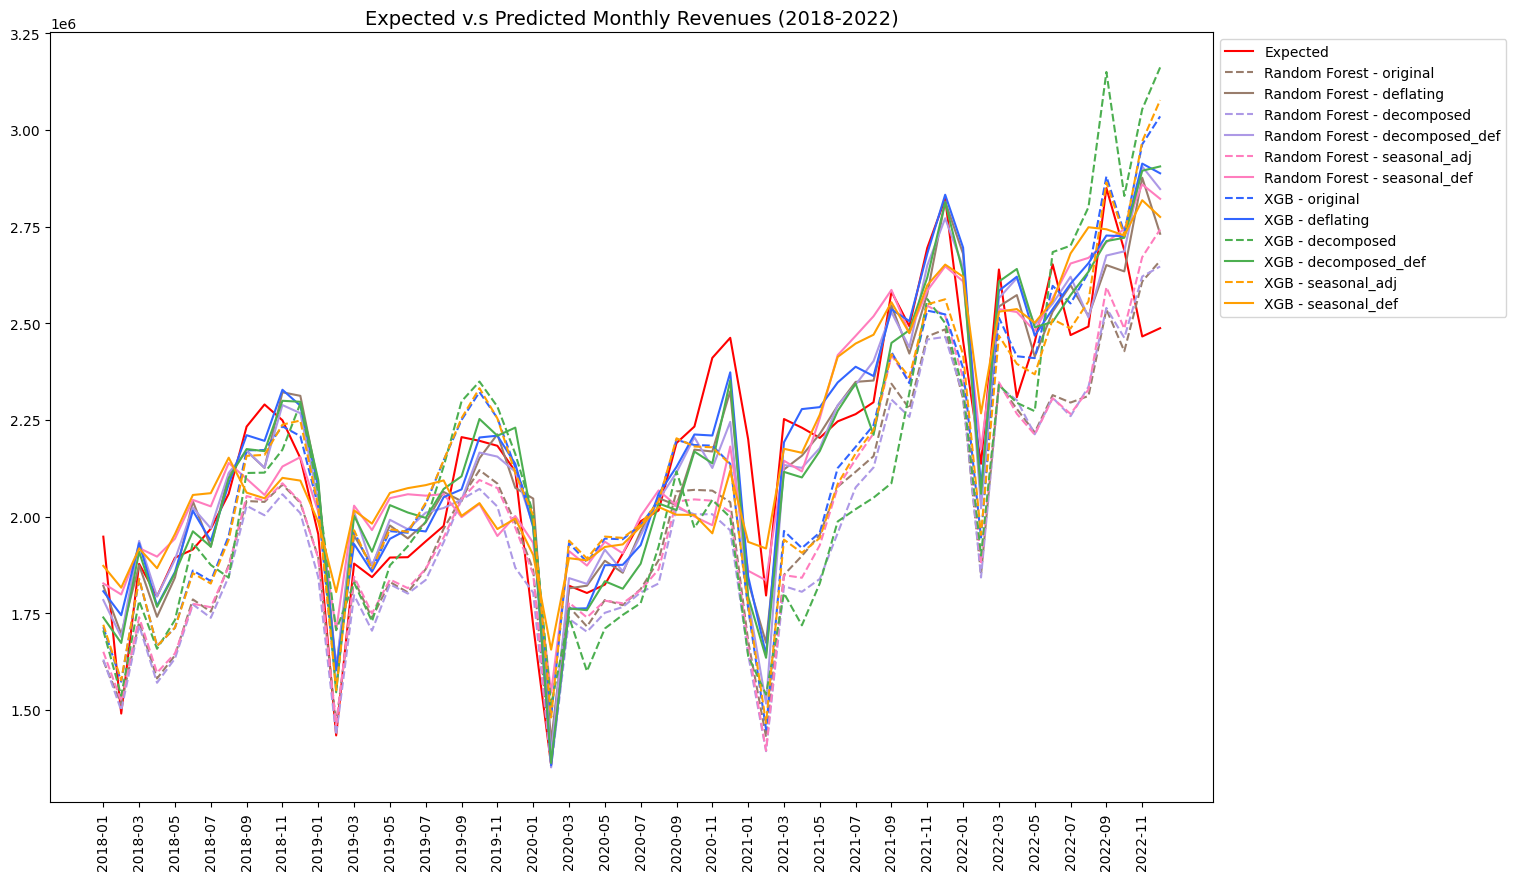

In [ ]:
plotExpectedPredictedRevenues(org_data, pred_rf, pred_xgb, start_y)
# plotExpectedPredictedRevenues(org_data, org_pred_rf, def_pred_rf, dec_pred_rf, dec_def_pred_rf, season_pred_rf, season_def_pred_rf, org_pred_xgb, def_pred_xgb, dec_pred_xgb, dec_def_pred_xgb, season_pred_xgb, season_def_pred_xgb, start_y)

#### **8.1.2 分模型畫圖**

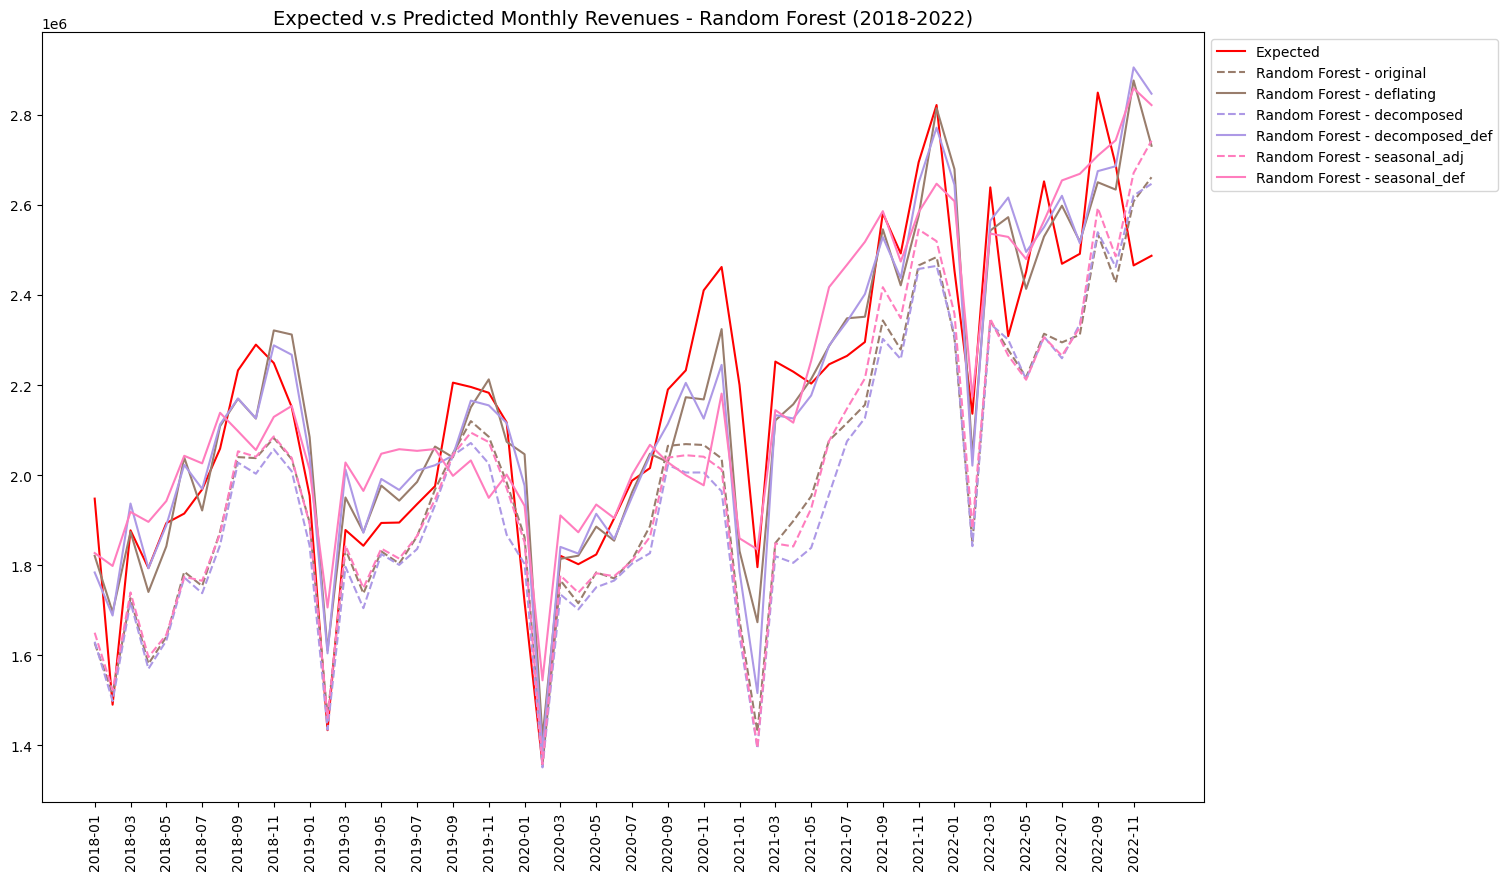

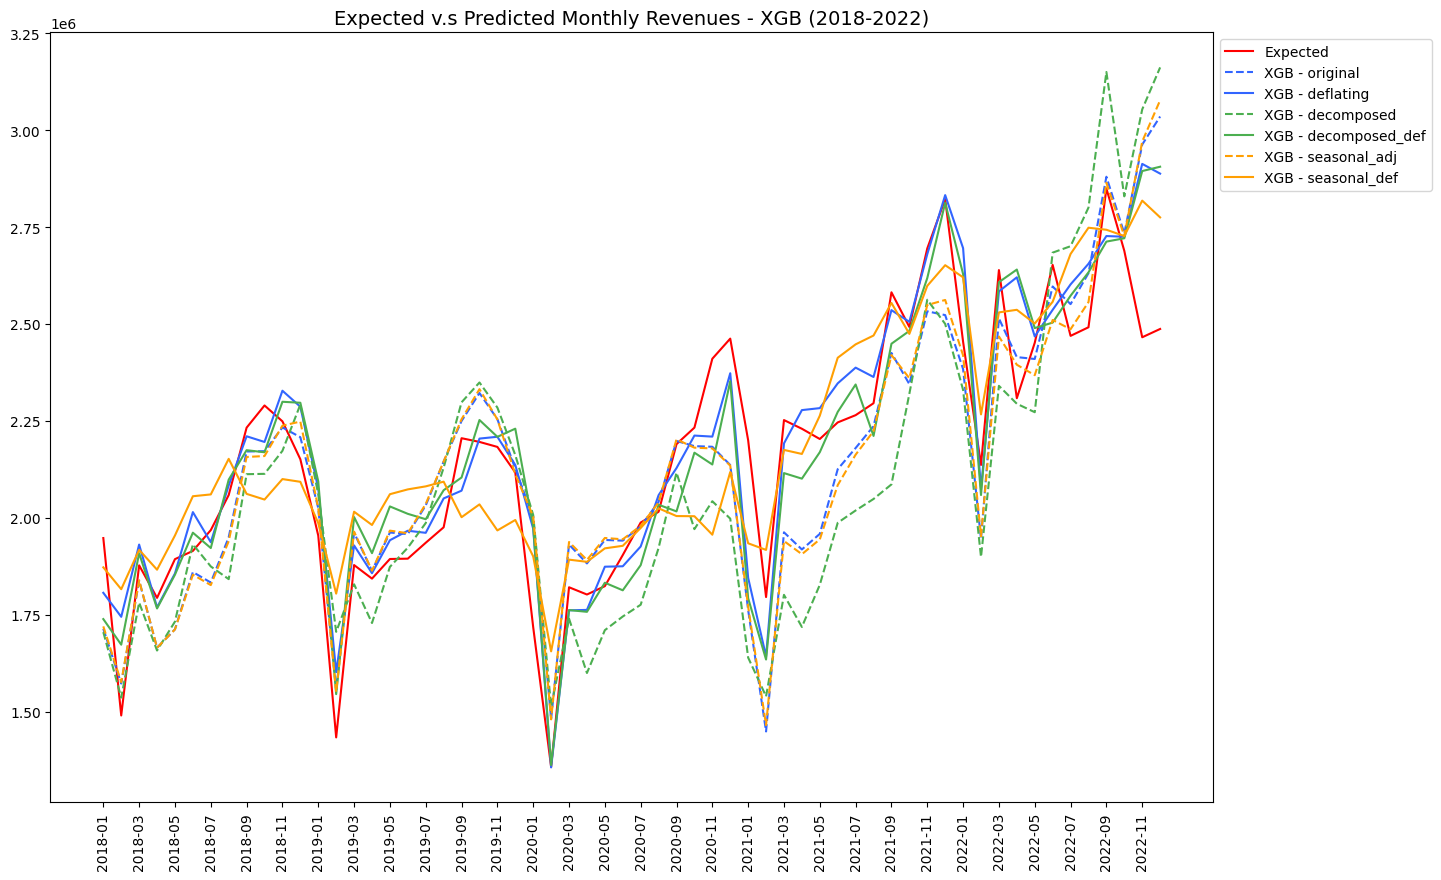

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_rf, 'rf', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_xgb, 'xgb', start_y)
# plotModelExpectedPredictedRevenues(org_data, org_pred_rf, def_pred_rf, dec_pred_rf, dec_def_pred_rf, season_pred_rf, season_def_pred_rf, 'rf', start_y)
# plotModelExpectedPredictedRevenues(org_data, org_pred_xgb, def_pred_xgb, dec_pred_xgb, dec_def_pred_xgb, season_pred_xgb, season_def_pred_xgb, 'xgb', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.1 Plot All Scores**

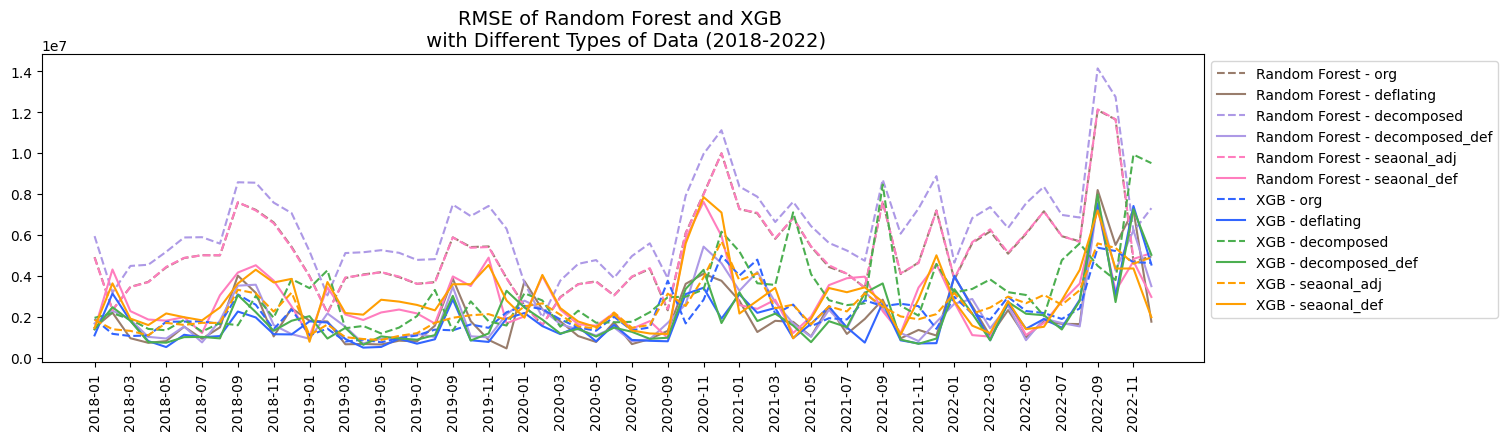

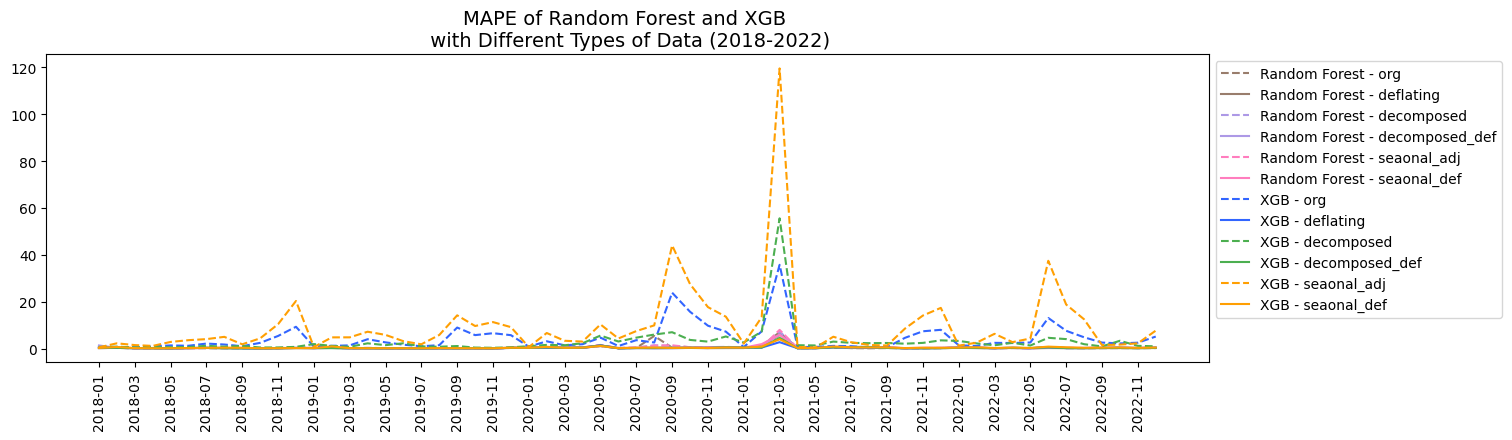

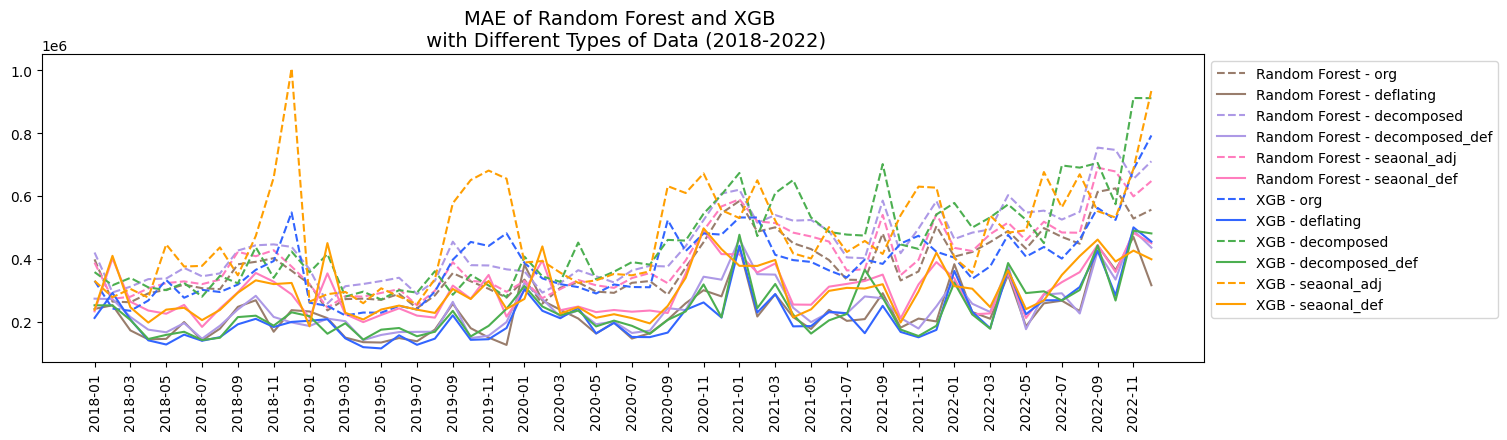

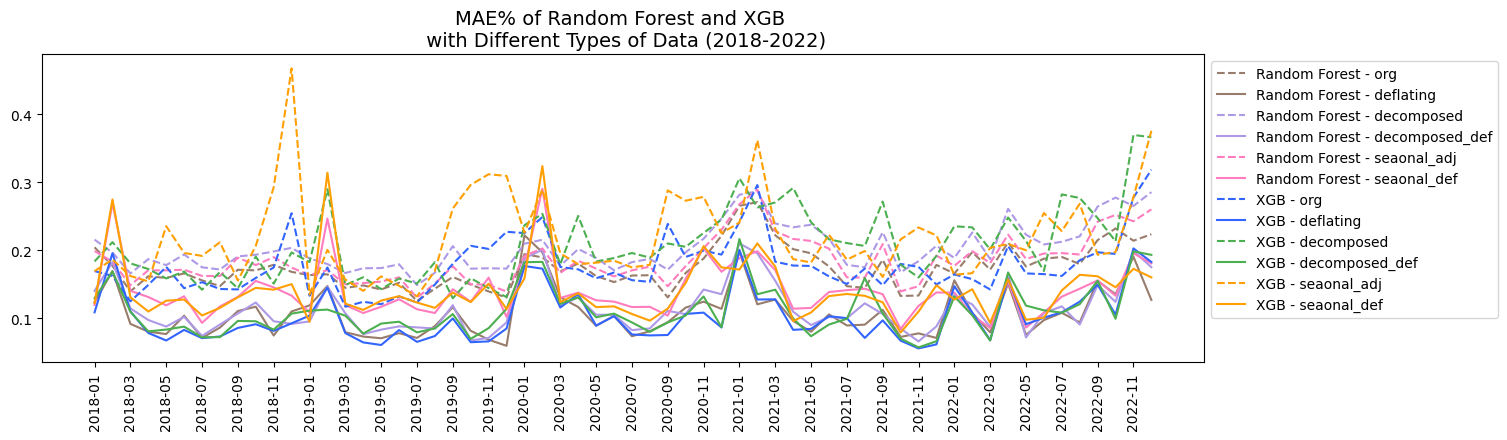

In [ ]:
plotAllScores(scores_rf, scores_xgb, start_y)

#### **8.2.2 分模型畫圖**

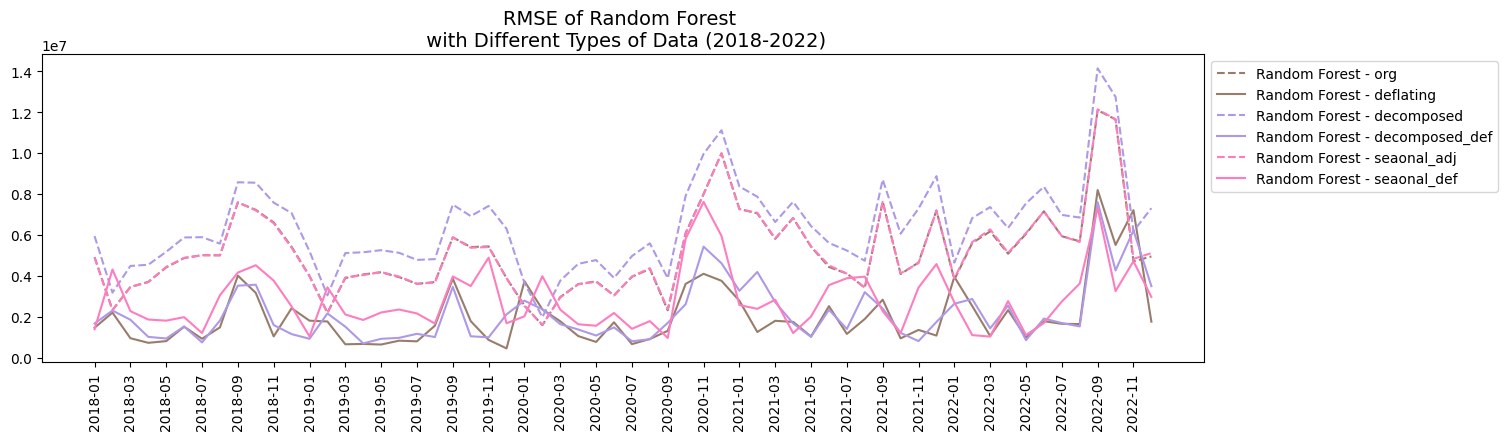

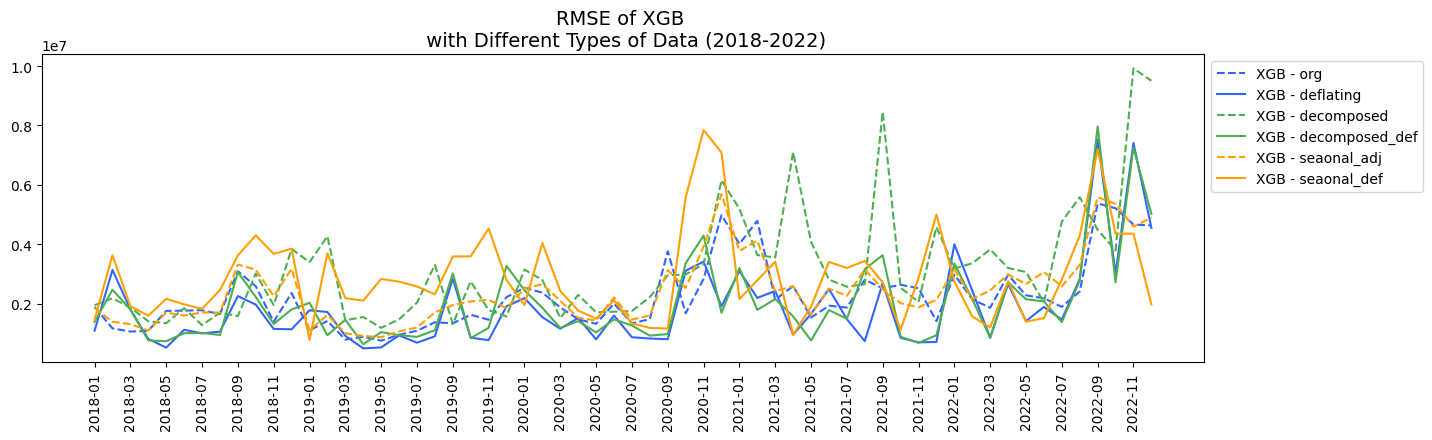

In [ ]:
# RMSE
compareModelScore(scores_rf, scores_xgb, 'RMSE', start_y)  

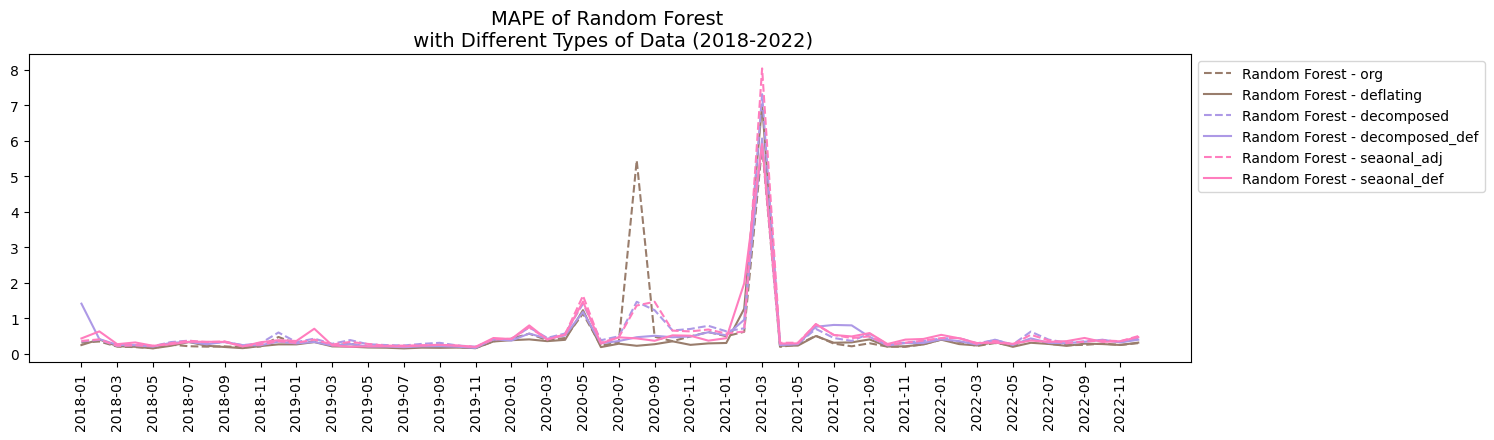

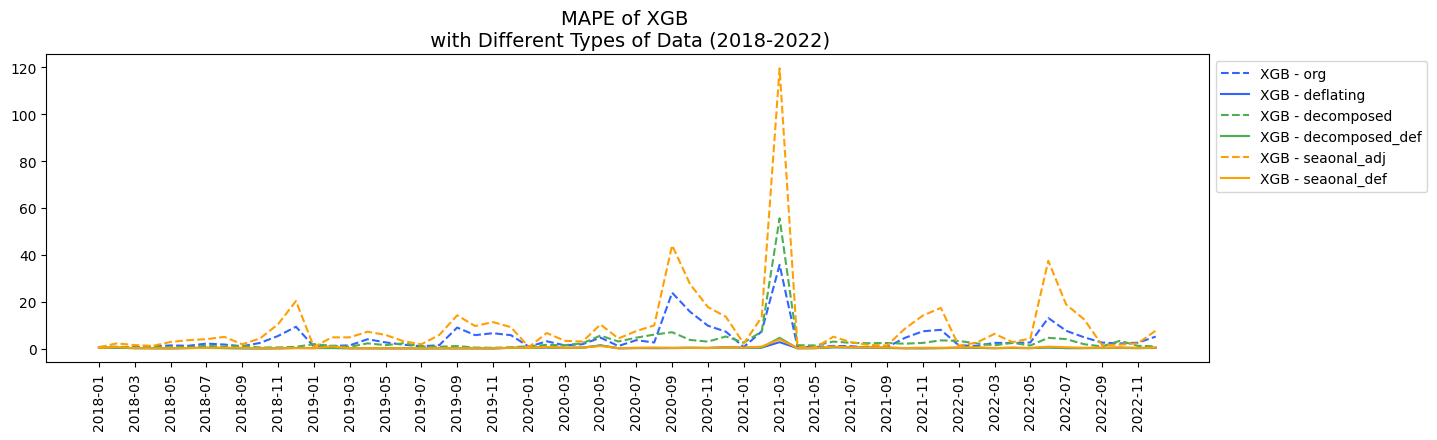

In [ ]:
# MAPE
compareModelScore(scores_rf, scores_xgb, 'MAPE', start_y)  

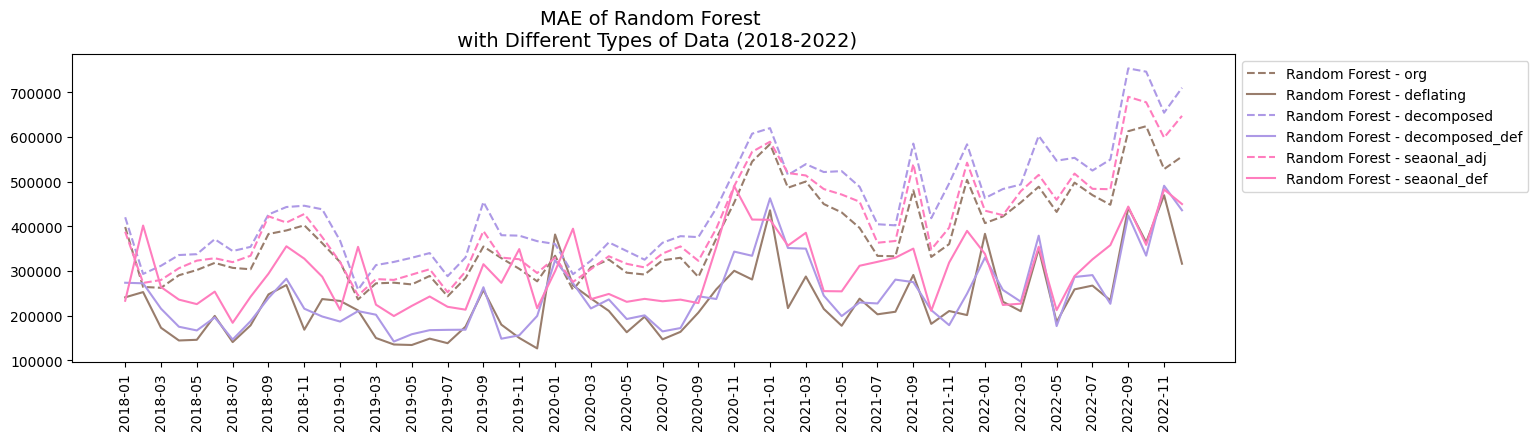

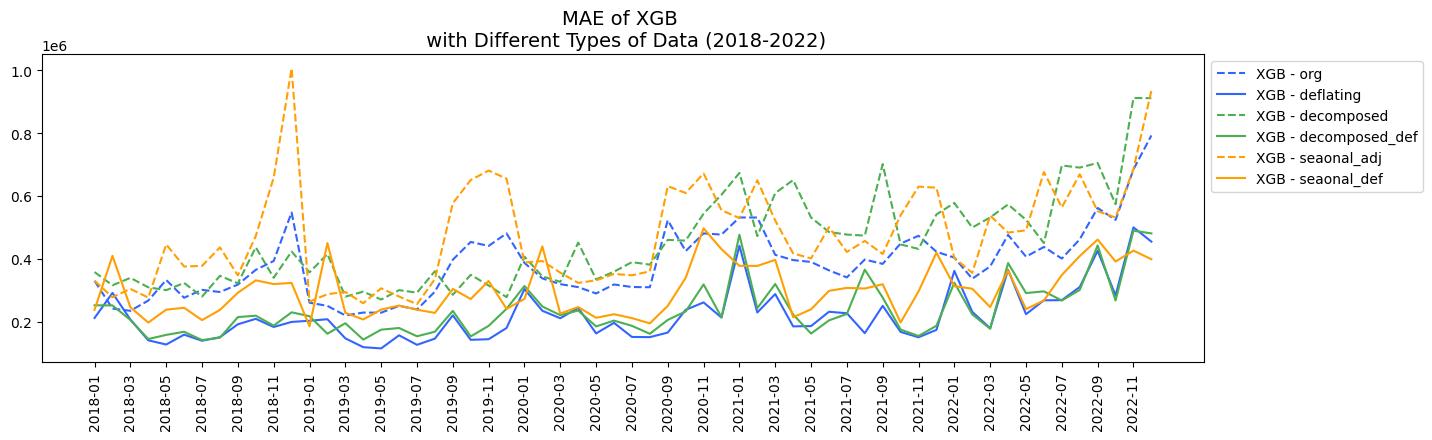

In [ ]:
# MAE
compareModelScore(scores_rf, scores_xgb, 'MAE', start_y)  

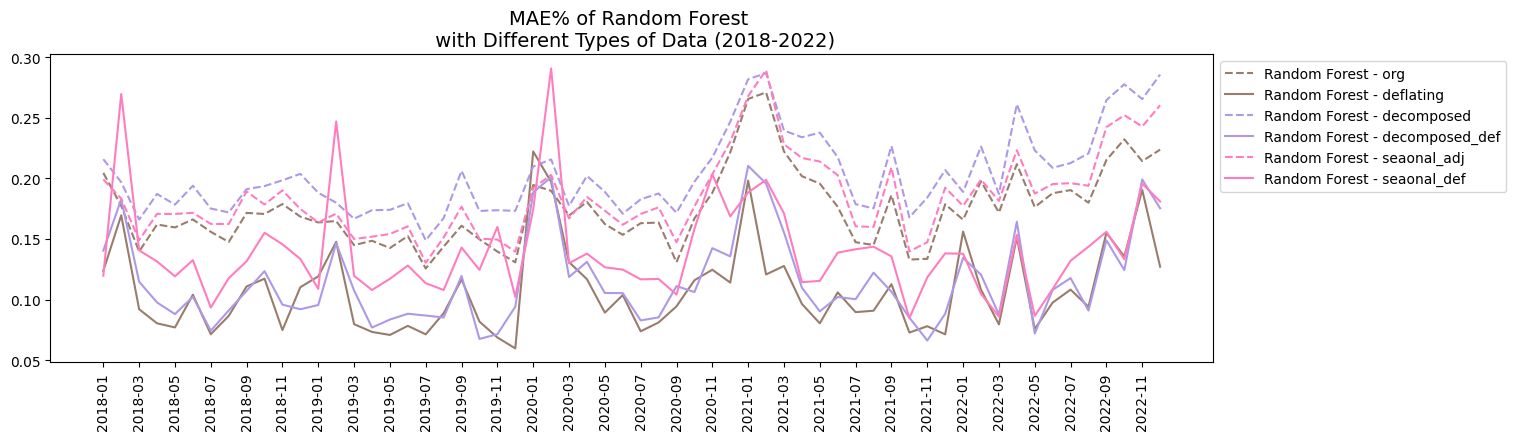

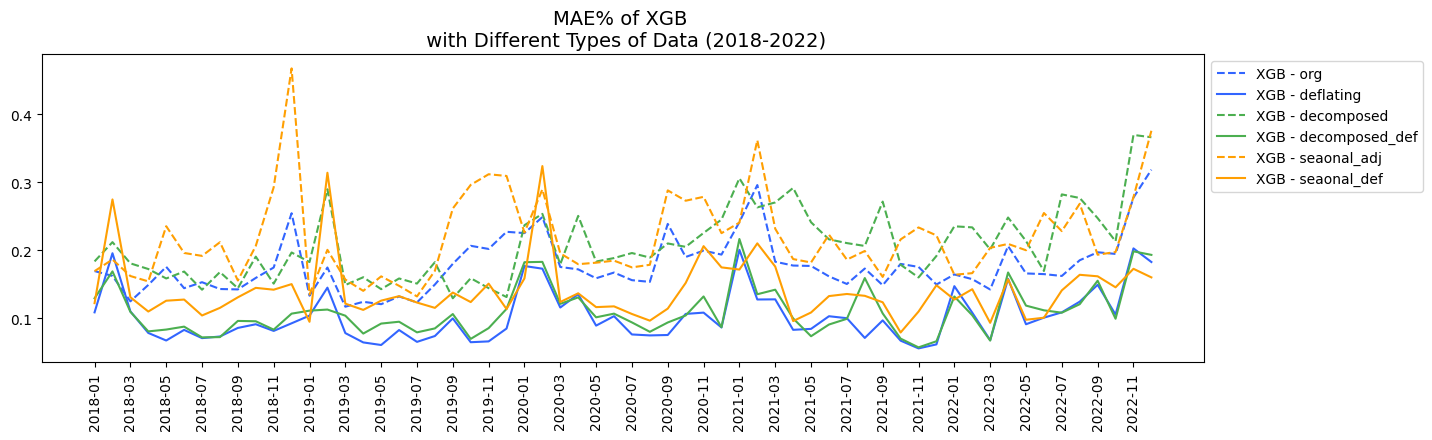

In [ ]:
# MAE%
compareModelScore(scores_rf, scores_xgb, 'MAE%', start_y)  

#### **8.2.3 Boxplot**

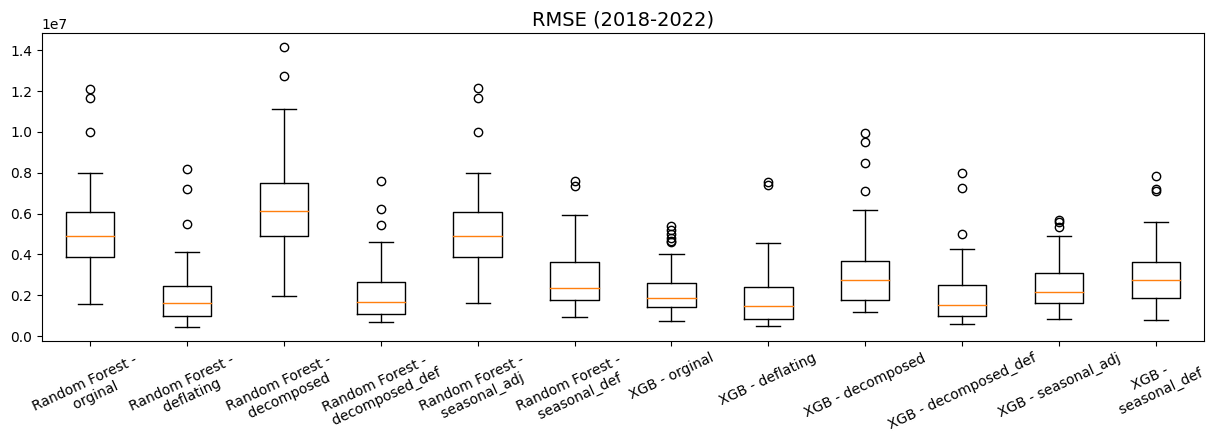

In [ ]:
# RMSE
scoreBoxplotV(scores_rf, scores_xgb, 'RMSE', start_y)  

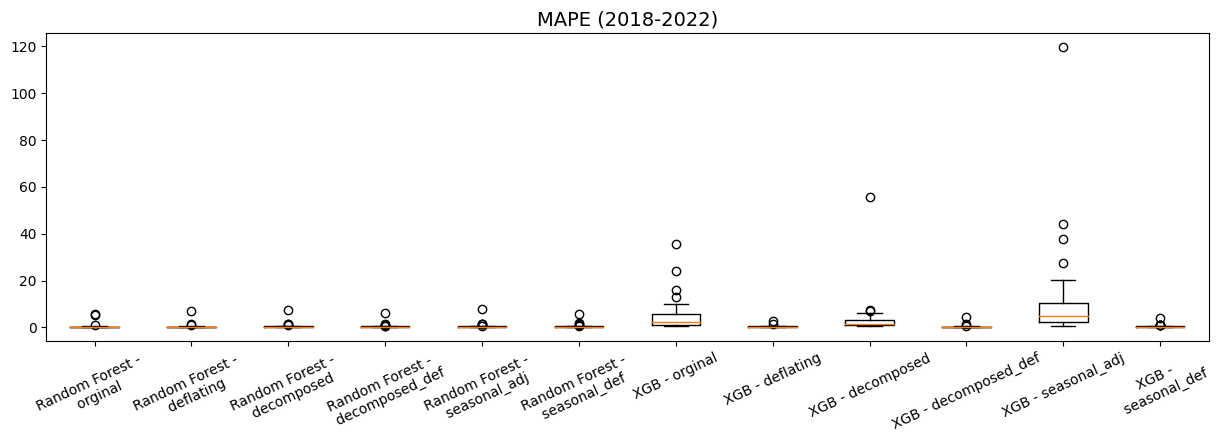

In [ ]:
# MAPE
scoreBoxplotV(scores_rf, scores_xgb, 'MAPE', start_y)  

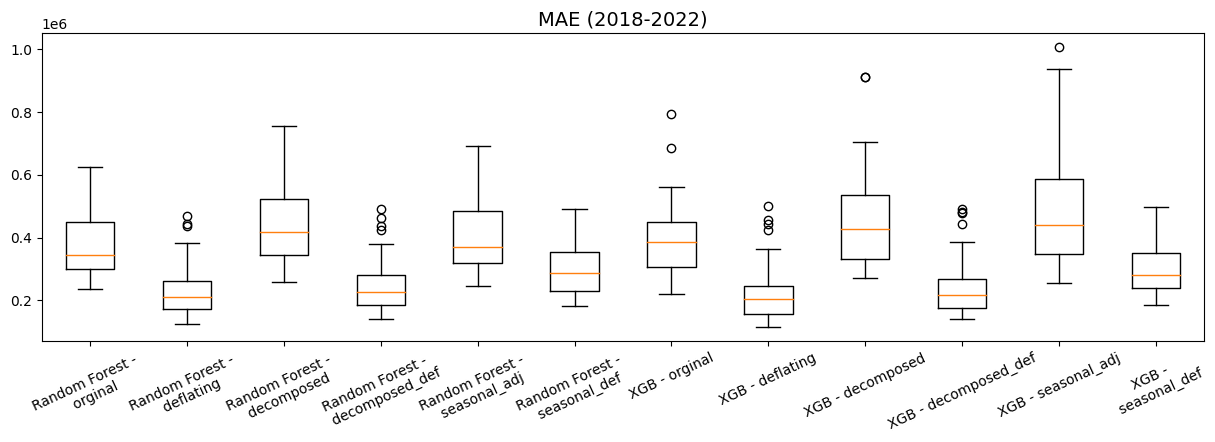

In [ ]:
# MAE
scoreBoxplotV(scores_rf, scores_xgb, 'MAE', start_y)  

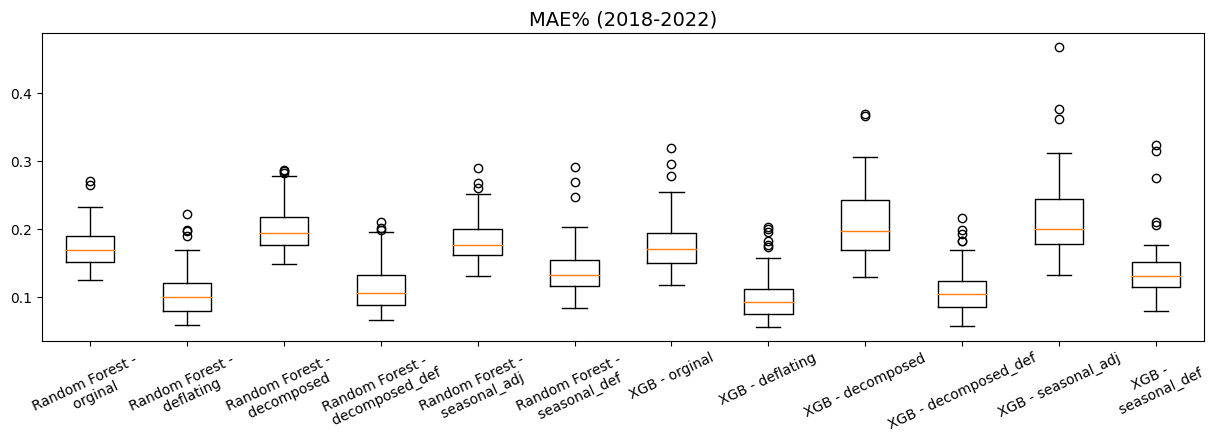

In [ ]:
# MAE%
scoreBoxplotV(scores_rf, scores_xgb, 'MAE%', start_y)  

### **8.3 Feature Importance**

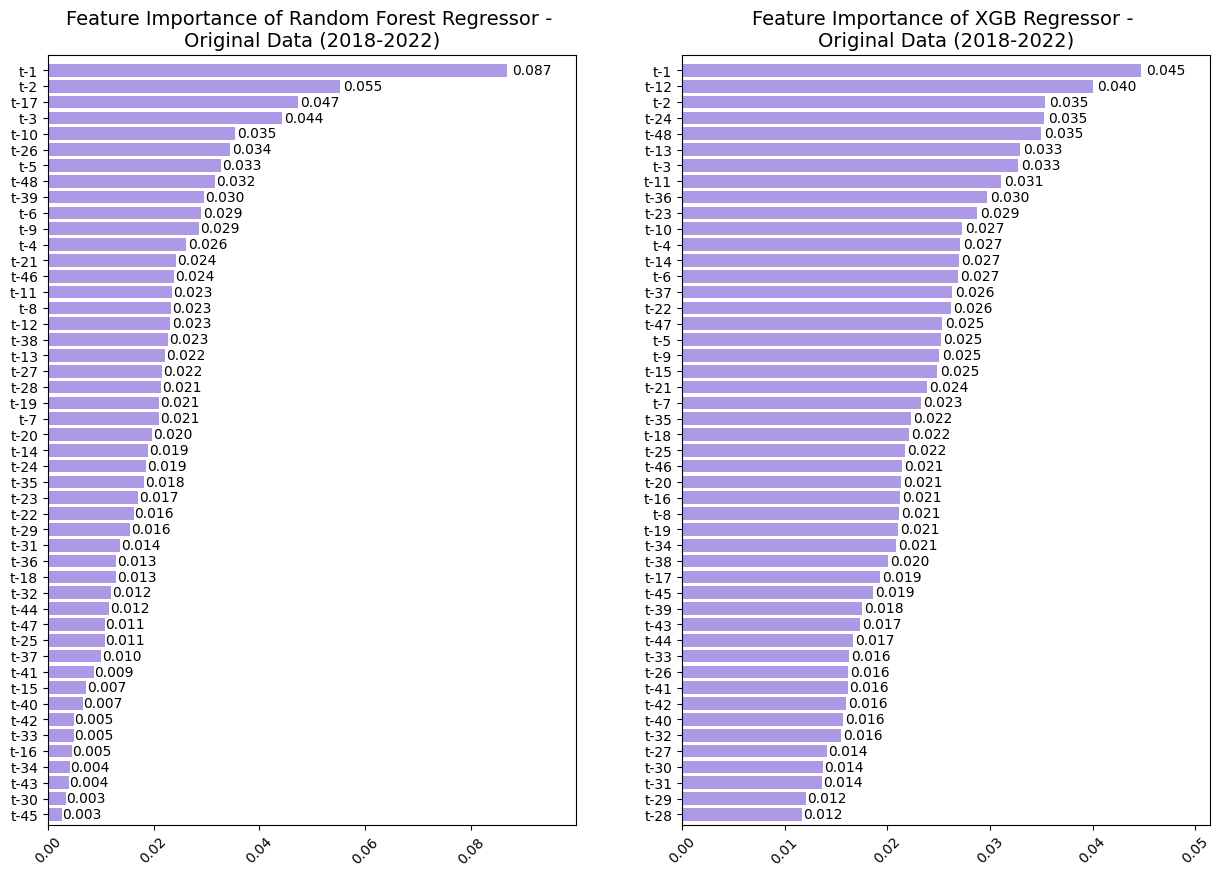

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['org'], feature_importance_xgb['org']['org'], 'org', start_y, 48)

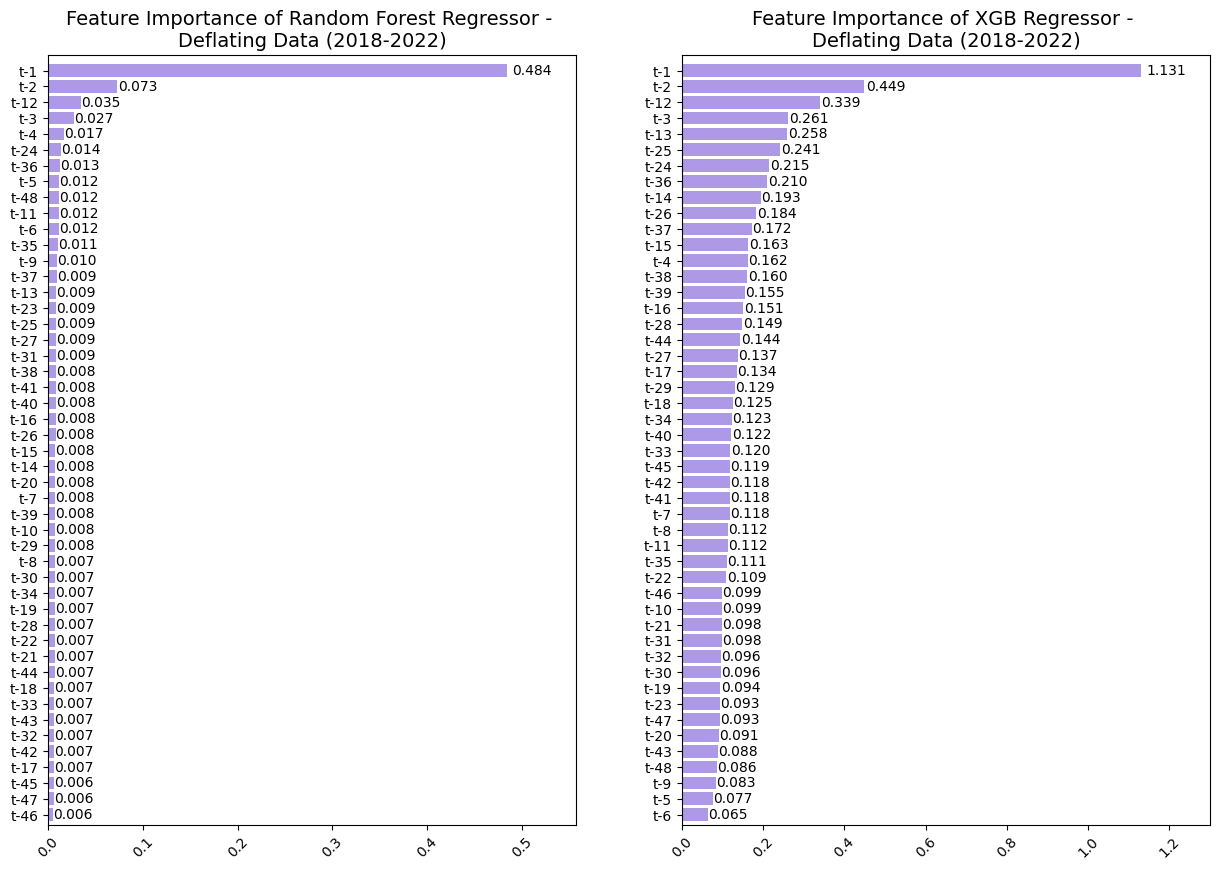

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['org'], feature_importance_xgb['def']['org'], 'def', start_y, 48)

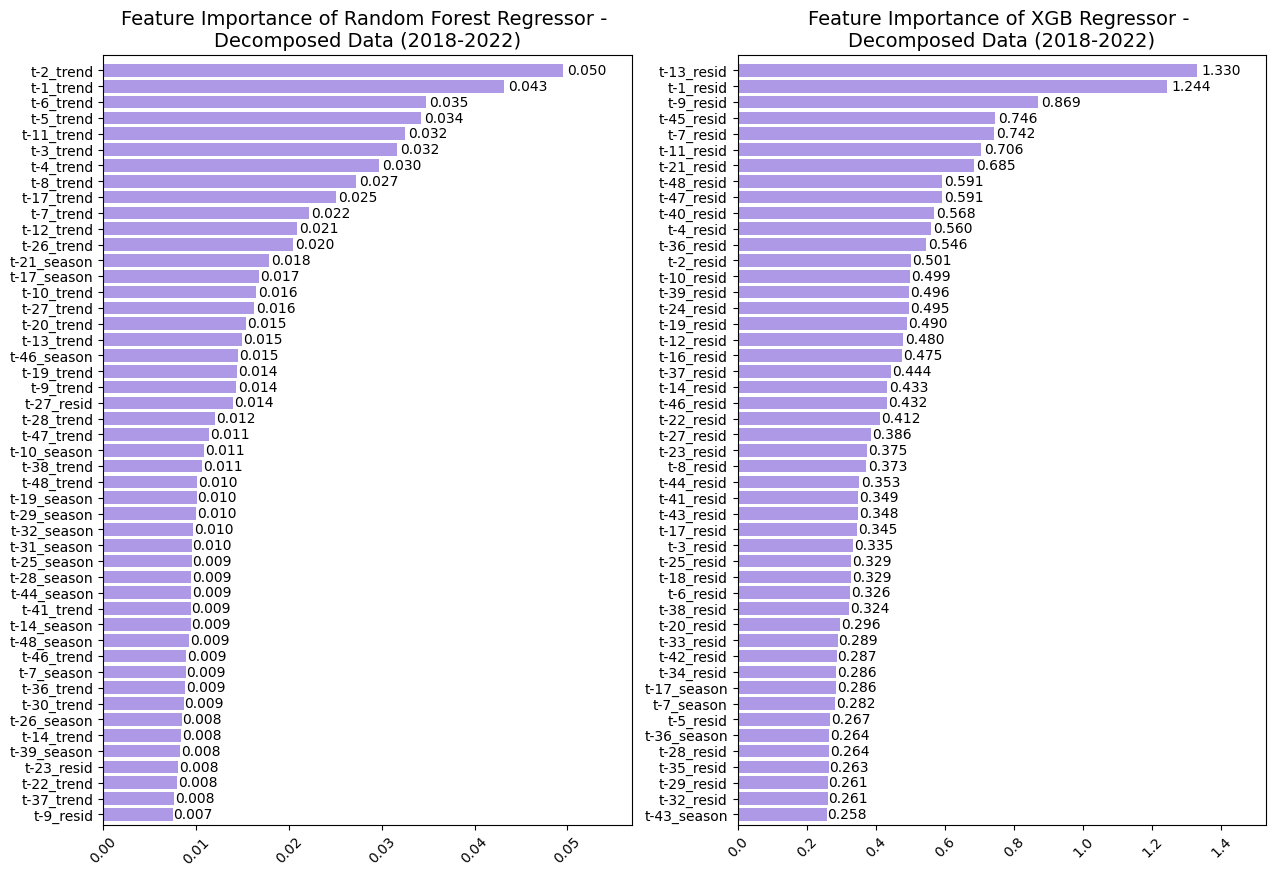

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['dec'], feature_importance_xgb['org']['dec'], 'dec', start_y, 48)

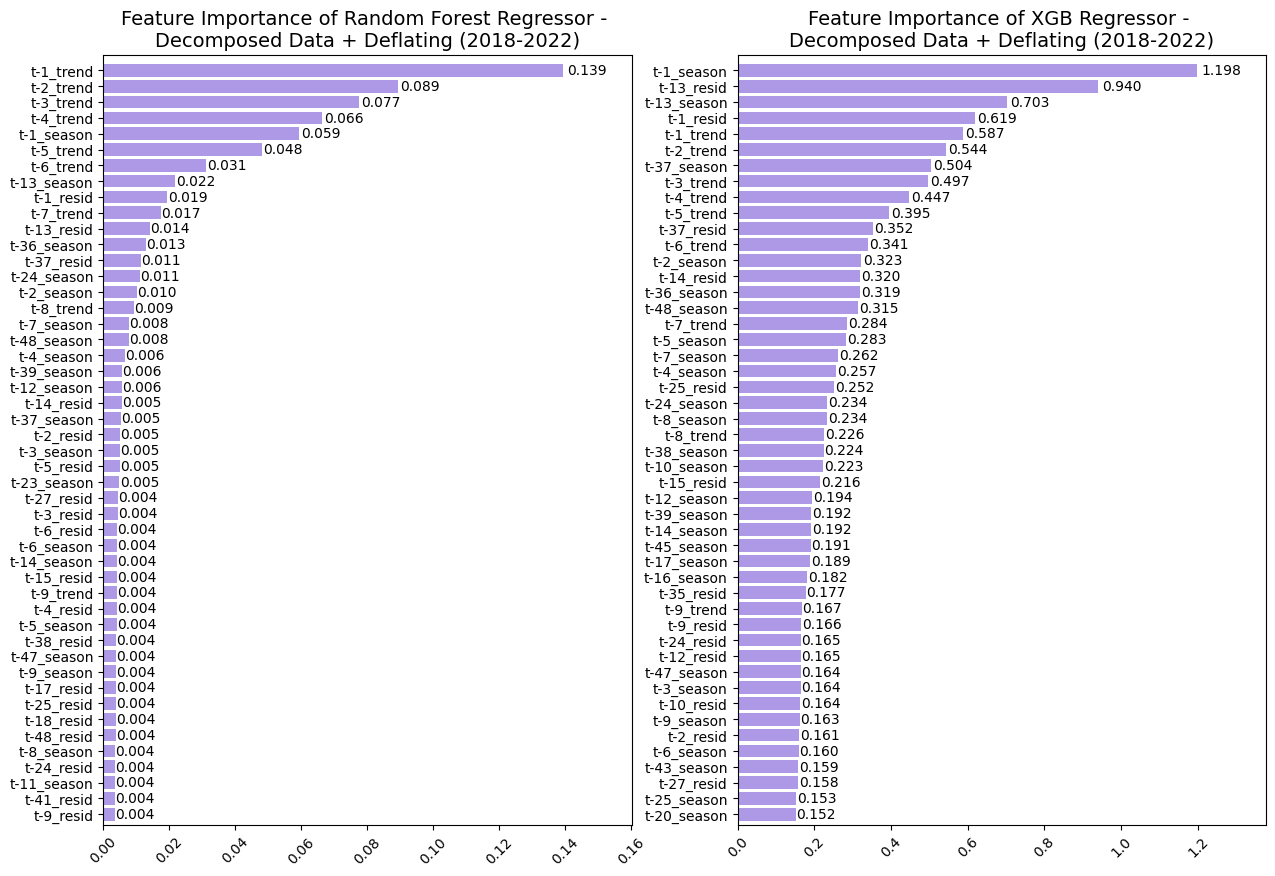

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['dec'], feature_importance_xgb['def']['dec'], 'dec_def', start_y, 48)

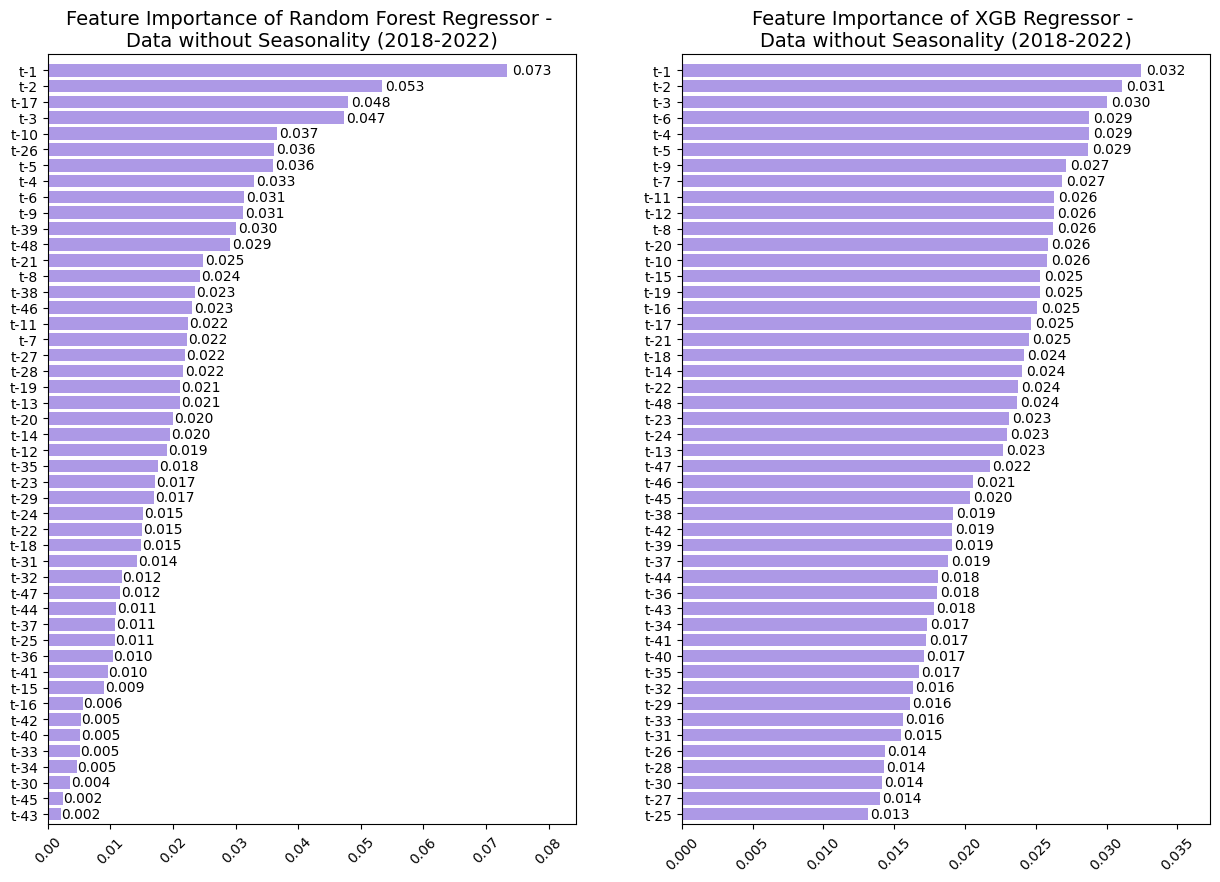

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['season'], feature_importance_xgb['org']['season'], 'season', start_y, 48)

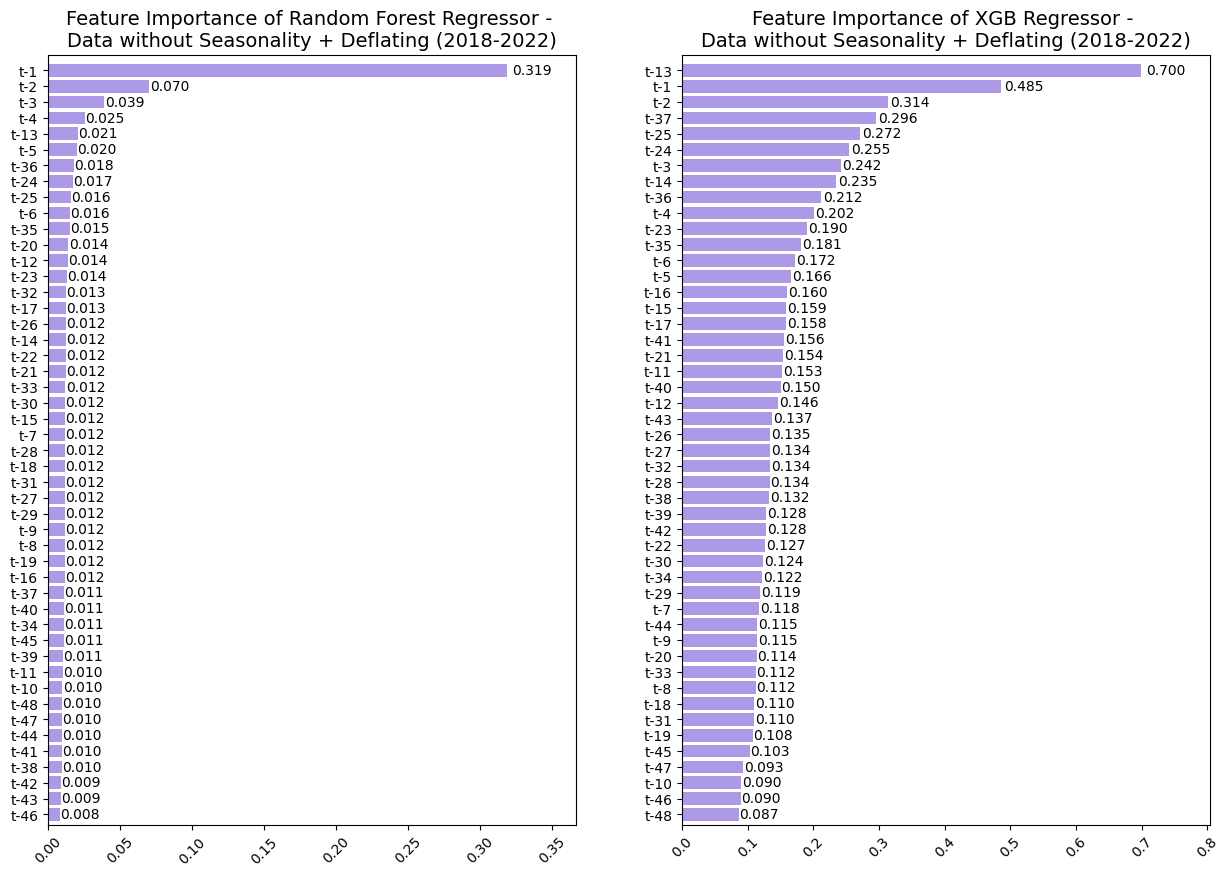

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['season'], feature_importance_xgb['def']['season'], 'season_def', start_y, 48)

## **9. Best and Worst Model**

2023.04.05

In [ ]:
bw = BestWorstModel(scores_rf, scores_xgb)

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|6|4|2 (fixed)|2x6x4x2 = 96|

#### **9.1.1 RMSE**

In [ ]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [ ]:
best_rmse

modelName    dataType scoreType min_month  min_score
0   Random Forest         org      RMSE   2020-02  1582886.0
4   Random Forest         def      RMSE   2019-12   449231.0
8   Random Forest         dec      RMSE   2020-02  1973774.0
12  Random Forest     dec_def      RMSE   2019-04   691935.0
16  Random Forest      season      RMSE   2020-02  1603865.0
20  Random Forest  season_def      RMSE   2020-09   960033.0
0             XGB         org      RMSE   2019-05   748454.0
4             XGB         def      RMSE   2019-04   487794.0
8             XGB         dec      RMSE   2019-05  1179380.0
12            XGB     dec_def      RMSE   2019-04   625399.0
16            XGB      season      RMSE   2019-05   862870.0
20            XGB  season_def      RMSE   2019-01   773940.0

##### **最差月份**

In [ ]:
worst_rmse

modelName    dataType scoreType max_month   max_score
0   Random Forest         org      RMSE   2022-09  12096525.0
4   Random Forest         def      RMSE   2022-09   8191947.0
8   Random Forest         dec      RMSE   2022-09  14137848.0
12  Random Forest     dec_def      RMSE   2022-09   7595997.0
16  Random Forest      season      RMSE   2022-09  12137258.0
20  Random Forest  season_def      RMSE   2020-11   7611534.0
0             XGB         org      RMSE   2022-09   5372432.0
4             XGB         def      RMSE   2022-09   7526832.0
8             XGB         dec      RMSE   2022-11   9922762.0
12            XGB     dec_def      RMSE   2022-09   7962671.0
16            XGB      season      RMSE   2020-12   5682993.0
20            XGB  season_def      RMSE   2020-11   7845101.0

#### **9.1.2 MAPE**

In [ ]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [ ]:
best_mape

modelName    dataType scoreType min_month  min_score
3   Random Forest         org      MAPE   2018-05     0.1511
7   Random Forest         def      MAPE   2019-07     0.1440
11  Random Forest         dec      MAPE   2019-11     0.1923
15  Random Forest     dec_def      MAPE   2019-11     0.1572
19  Random Forest      season      MAPE   2019-11     0.1855
23  Random Forest  season_def      MAPE   2019-11     0.1856
3             XGB         org      MAPE   2021-08     0.5651
7             XGB         def      MAPE   2019-11     0.1583
11            XGB         dec      MAPE   2019-11     0.4109
15            XGB     dec_def      MAPE   2018-10     0.1495
19            XGB      season      MAPE   2021-05     0.5094
23            XGB  season_def      MAPE   2019-11     0.1902

##### **最差月份**

In [ ]:
worst_mape

modelName    dataType scoreType max_month  max_score
3   Random Forest         org      MAPE   2021-03     5.8601
7   Random Forest         def      MAPE   2021-03     7.0245
11  Random Forest         dec      MAPE   2021-03     7.3203
15  Random Forest     dec_def      MAPE   2021-03     6.0687
19  Random Forest      season      MAPE   2021-03     8.0470
23  Random Forest  season_def      MAPE   2021-03     5.9124
3             XGB         org      MAPE   2021-03    35.7816
7             XGB         def      MAPE   2021-03     2.8024
11            XGB         dec      MAPE   2021-03    55.6024
15            XGB     dec_def      MAPE   2021-03     4.6550
19            XGB      season      MAPE   2021-03   119.5122
23            XGB  season_def      MAPE   2021-03     4.0377

#### **9.1.3 MAE**

In [ ]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [ ]:
best_mae

modelName    dataType scoreType min_month  min_score
1   Random Forest         org       MAE   2019-02   236181.0
5   Random Forest         def       MAE   2019-12   126433.0
9   Random Forest         dec       MAE   2019-02   257956.0
13  Random Forest     dec_def       MAE   2019-04   141820.0
17  Random Forest      season       MAE   2019-02   245015.0
21  Random Forest  season_def       MAE   2018-07   183798.0
1             XGB         org       MAE   2019-03   220116.0
5             XGB         def       MAE   2019-05   115374.0
9             XGB         dec       MAE   2019-05   270762.0
13            XGB     dec_def       MAE   2018-07   141850.0
17            XGB      season       MAE   2019-07   256087.0
21            XGB  season_def       MAE   2019-01   185642.0

##### **最差月份**

In [ ]:
worst_mae

modelName    dataType scoreType max_month  max_score
1   Random Forest         org       MAE   2022-10   624279.0
5   Random Forest         def       MAE   2022-11   469726.0
9   Random Forest         dec       MAE   2022-09   753829.0
13  Random Forest     dec_def       MAE   2022-11   490914.0
17  Random Forest      season       MAE   2022-09   690128.0
21  Random Forest  season_def       MAE   2020-11   489999.0
1             XGB         org       MAE   2022-12   792473.0
5             XGB         def       MAE   2022-11   500250.0
9             XGB         dec       MAE   2022-11   911565.0
13            XGB     dec_def       MAE   2022-11   489779.0
17            XGB      season       MAE   2018-12  1005701.0
21            XGB  season_def       MAE   2020-11   497096.0

#### **9.1.3 MAE%**

In [ ]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [ ]:
best_mae_p

modelName    dataType scoreType min_month  min_score
2   Random Forest         org      MAE%   2019-07     0.1256
6   Random Forest         def      MAE%   2019-12     0.0597
10  Random Forest         dec      MAE%   2019-07     0.1489
14  Random Forest     dec_def      MAE%   2021-11     0.0662
18  Random Forest      season      MAE%   2019-07     0.1304
22  Random Forest  season_def      MAE%   2021-10     0.0846
2             XGB         org      MAE%   2019-03     0.1172
6             XGB         def      MAE%   2021-11     0.0559
10            XGB         dec      MAE%   2019-09     0.1296
14            XGB     dec_def      MAE%   2021-11     0.0574
18            XGB      season      MAE%   2019-07     0.1323
22            XGB  season_def      MAE%   2021-10     0.0793

##### **最差月份**

In [ ]:
worst_mae_p

modelName    dataType scoreType max_month  max_score
2   Random Forest         org      MAE%   2021-02     0.2709
6   Random Forest         def      MAE%   2020-01     0.2222
10  Random Forest         dec      MAE%   2021-02     0.2868
14  Random Forest     dec_def      MAE%   2021-01     0.2103
18  Random Forest      season      MAE%   2021-02     0.2893
22  Random Forest  season_def      MAE%   2020-02     0.2907
2             XGB         org      MAE%   2022-12     0.3186
6             XGB         def      MAE%   2022-11     0.2029
10            XGB         dec      MAE%   2022-11     0.3697
14            XGB     dec_def      MAE%   2021-01     0.2167
18            XGB      season      MAE%   2018-12     0.4675
22            XGB  season_def      MAE%   2020-02     0.3239

### **9.2 Random Forest 和 XGB 各自預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|1|4|2 (fixed)|2x1x4x2 = 16|

In [ ]:
imp_plot = BestWorstModelFeatureImportancePlot(feature_importance_rf, feature_importance_xgb, bw.best_rf, bw.worst_rf, bw.best_xgb, bw.worst_xgb, bw.best_all, bw.worst_all, start_y)
top_k = 5

#### **9.2.1 RMSE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['RMSE']

modelName dataType scoreType min_month  min_score
4  Random Forest      def      RMSE   2019-12   449231.0

In [ ]:
# XGB
bw.best_xgb['RMSE']

modelName dataType scoreType min_month  min_score
4       XGB      def      RMSE   2019-04   487794.0

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['RMSE']

modelName dataType scoreType max_month   max_score
8  Random Forest      dec      RMSE   2022-09  14137848.0

In [ ]:
# XGB
bw.worst_xgb['RMSE']

modelName dataType scoreType max_month  max_score
8       XGB      dec      RMSE   2022-11  9922762.0

##### **Feature Importance**



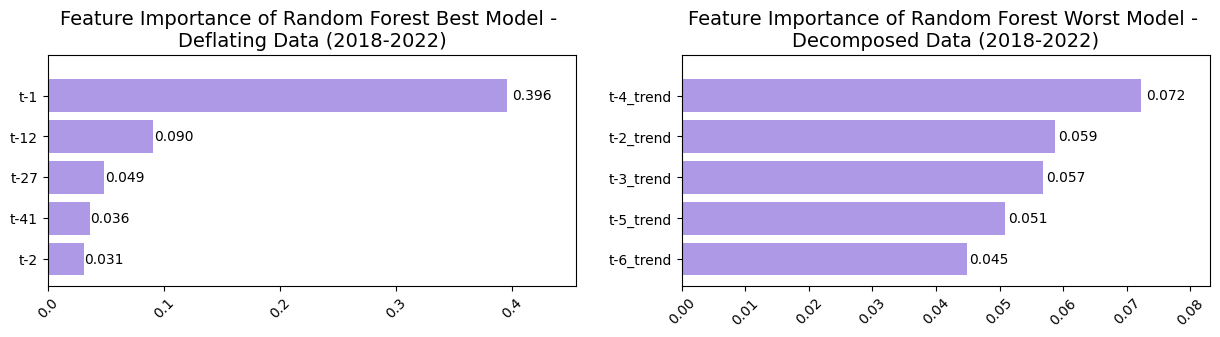

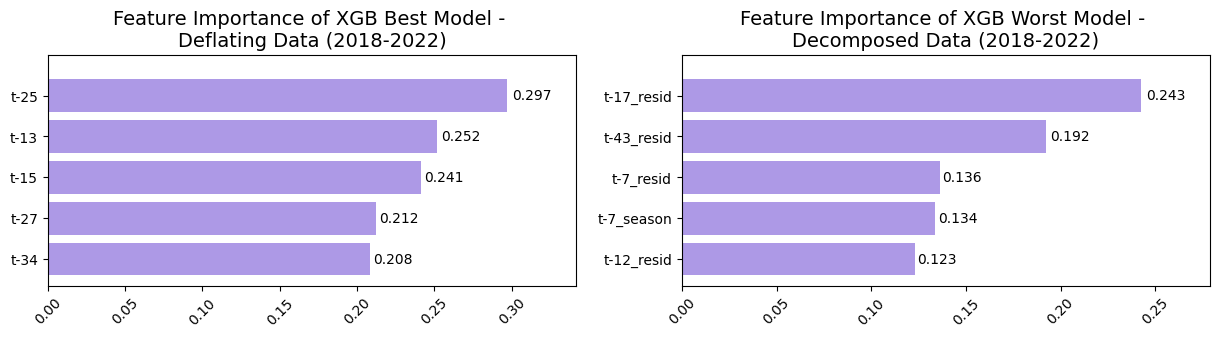

In [ ]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k)

#### **9.2.2 MAPE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAPE']

modelName dataType scoreType min_month  min_score
7  Random Forest      def      MAPE   2019-07      0.144

In [ ]:
# XGB
bw.best_xgb['MAPE']

modelName dataType scoreType min_month  min_score
15       XGB  dec_def      MAPE   2018-10     0.1495

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAPE']

modelName dataType scoreType max_month  max_score
19  Random Forest   season      MAPE   2021-03      8.047

In [ ]:
# XGB
bw.worst_xgb['MAPE']

modelName dataType scoreType max_month  max_score
19       XGB   season      MAPE   2021-03   119.5122

##### **Feature Importance**



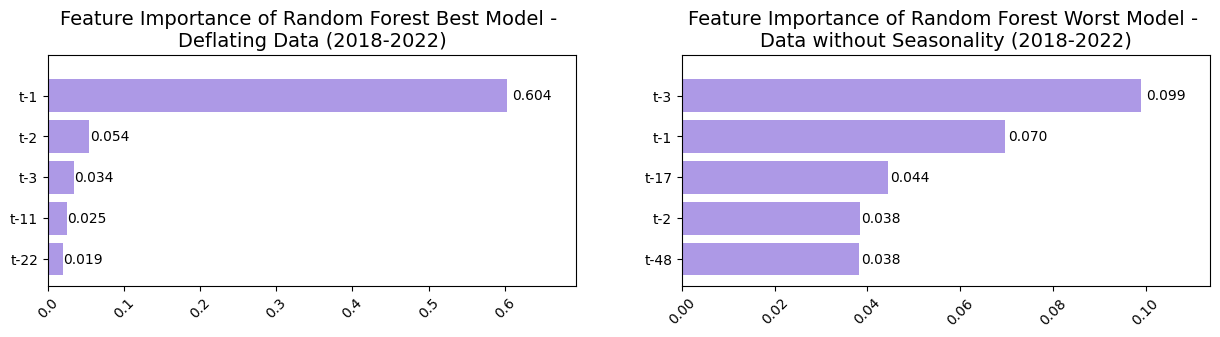

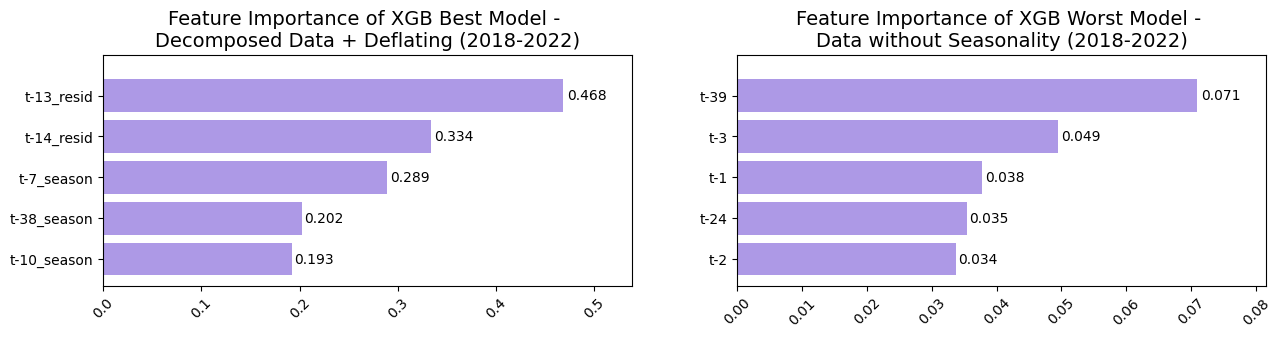

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k)

#### **9.2.3 MAE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAE']

modelName dataType scoreType min_month  min_score
5  Random Forest      def       MAE   2019-12   126433.0

In [ ]:
# XGB
bw.best_xgb['MAE']

modelName dataType scoreType min_month  min_score
5       XGB      def       MAE   2019-05   115374.0

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAE']

modelName dataType scoreType max_month  max_score
9  Random Forest      dec       MAE   2022-09   753829.0

In [ ]:
# XGB
bw.worst_xgb['MAE']

modelName dataType scoreType max_month  max_score
17       XGB   season       MAE   2018-12  1005701.0

##### **Feature Importance**



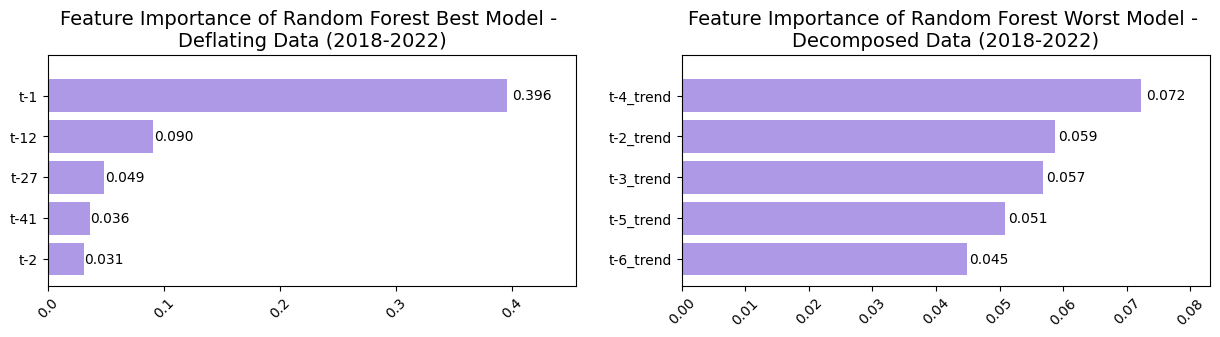

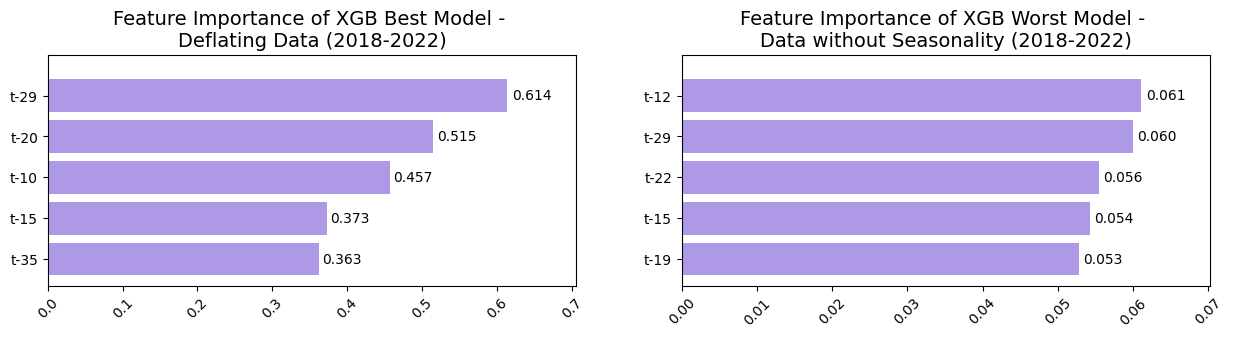

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k)

#### **9.2.4 MAE%**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAE%']

modelName dataType scoreType min_month  min_score
6  Random Forest      def      MAE%   2019-12     0.0597

In [ ]:
# XGB
bw.best_xgb['MAE%']

modelName dataType scoreType min_month  min_score
6       XGB      def      MAE%   2021-11     0.0559

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAE%']

modelName    dataType scoreType max_month  max_score
22  Random Forest  season_def      MAE%   2020-02     0.2907

In [ ]:
# XGB
bw.worst_xgb['MAE%']

modelName dataType scoreType max_month  max_score
18       XGB   season      MAE%   2018-12     0.4675

##### **Feature Importance**



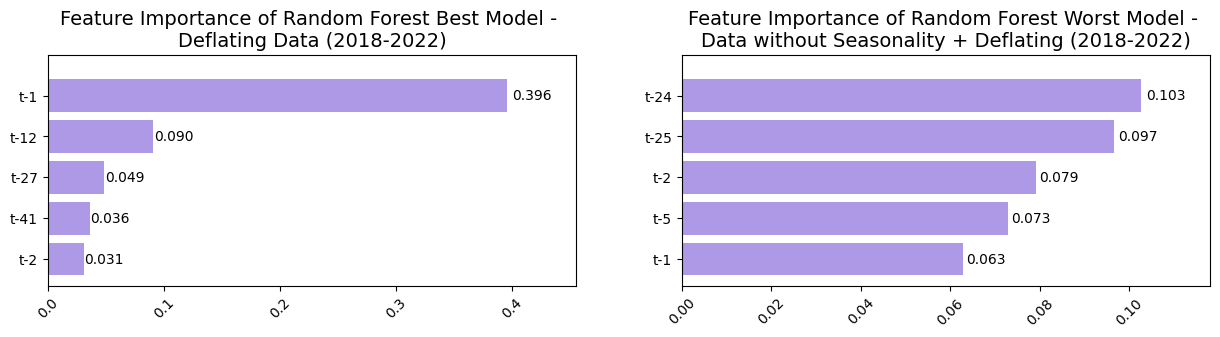

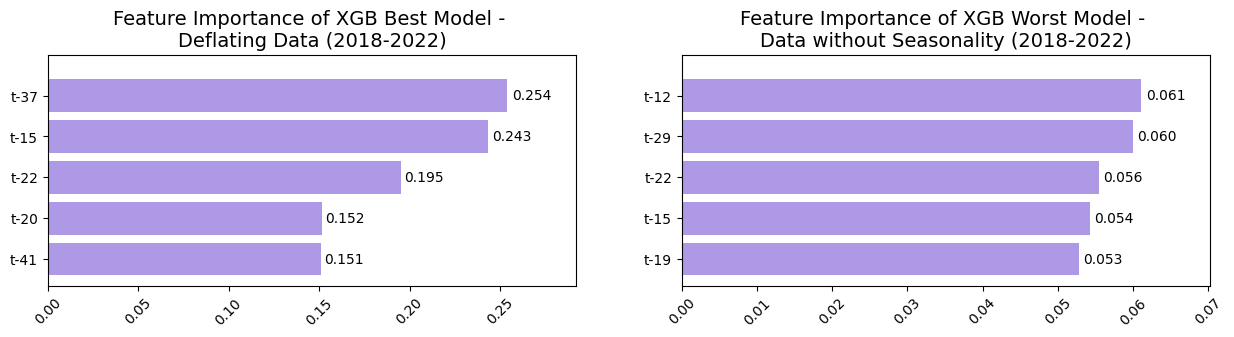

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k)

### **9.3 所有模型組合中，預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|


#### **9.3.1 RMSE**

##### **最佳模型**

In [ ]:
bw.best_all['RMSE']

modelName dataType scoreType min_month  min_score
4  Random Forest      def      RMSE   2019-12   449231.0

##### **最差模型**

In [ ]:
bw.worst_all['RMSE']

modelName dataType scoreType max_month   max_score
8  Random Forest      dec      RMSE   2022-09  14137848.0

##### **Feature Importance**



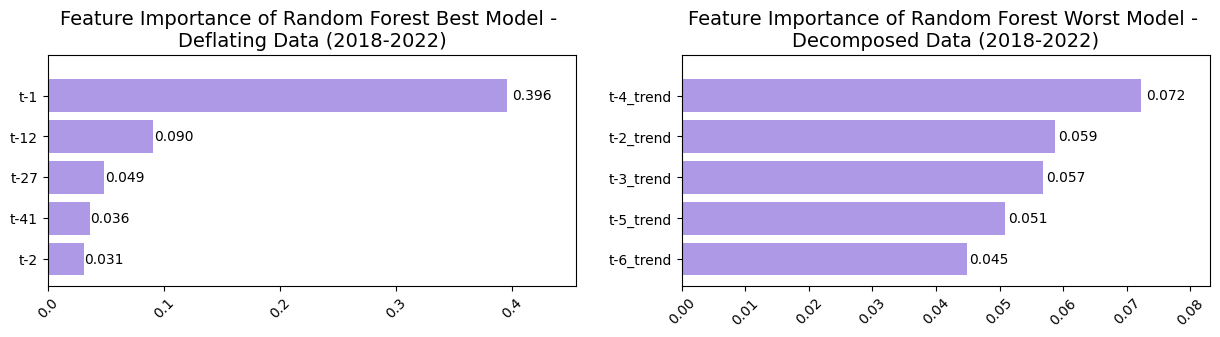

In [ ]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k, all = True)

#### **9.3.2 MAPE**

##### **最佳模型**

In [ ]:
bw.best_all['MAPE']

modelName dataType scoreType min_month  min_score
7  Random Forest      def      MAPE   2019-07      0.144

##### **最差模型**

In [ ]:
bw.worst_all['MAPE']

modelName dataType scoreType max_month  max_score
19       XGB   season      MAPE   2021-03   119.5122

##### **Feature Importance**



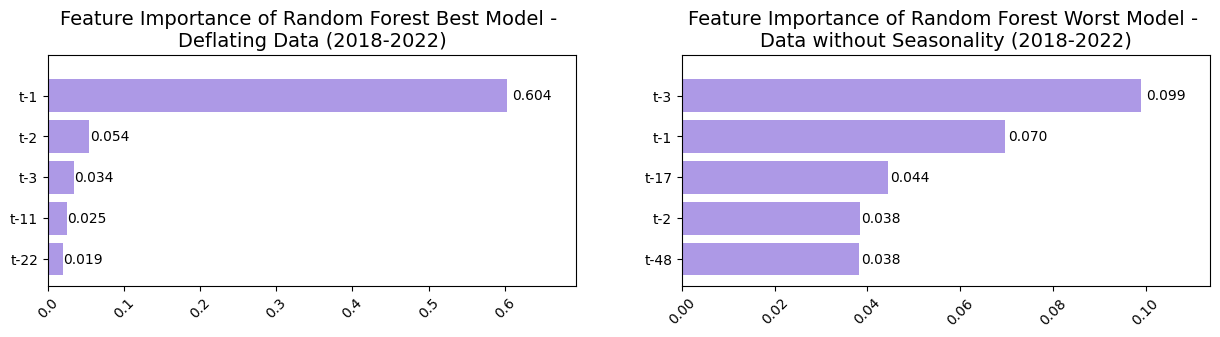

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k, all = True)

#### **9.3.3 MAE**

##### **最佳模型**

In [ ]:
bw.best_all['MAE']

modelName dataType scoreType min_month  min_score
5       XGB      def       MAE   2019-05   115374.0

##### **最差模型**

In [ ]:
bw.worst_all['MAE']

modelName dataType scoreType max_month  max_score
17       XGB   season       MAE   2018-12  1005701.0

##### **Feature Importance**



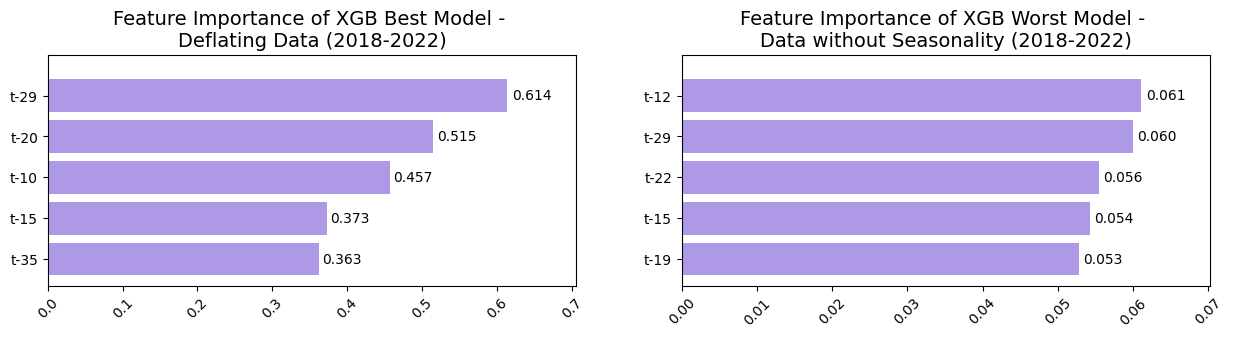

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k, all = True)

#### **9.3.4 MAE%**

##### **最佳模型**

In [ ]:
bw.best_all['MAE%']

modelName dataType scoreType min_month  min_score
6       XGB      def      MAE%   2021-11     0.0559

##### **最差模型**

In [ ]:
bw.worst_all['MAE%']

modelName dataType scoreType max_month  max_score
18       XGB   season      MAE%   2018-12     0.4675

##### **Feature Importance**



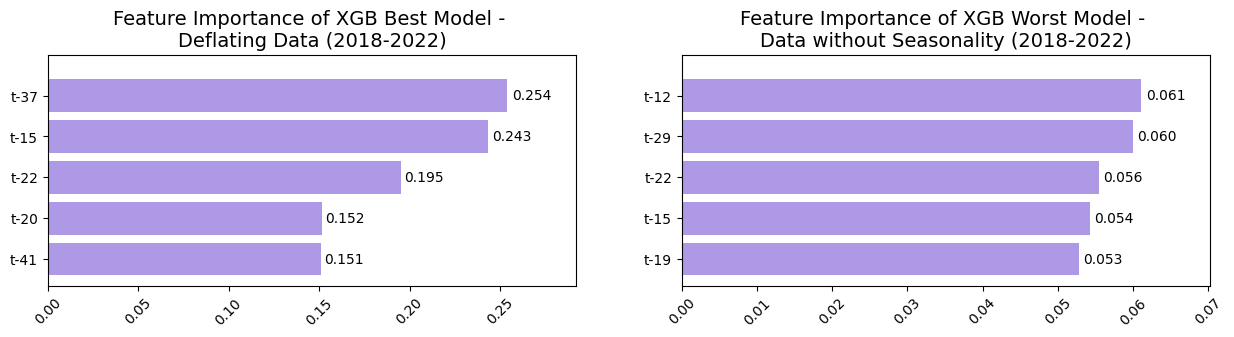

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k, all = True)